<img src="http://monqis.physics.monash.edu/images/funding-Monash.png" style="height:100px">

# FIT5196 Assessment 2: Exploratory Data Analysis and Data Cleansing
   #### Name: Subhasish Sarkar
   #### Student ID: 29819253
   #### Date:20/05/2019
   #### Environment: Python 3.6.8 and Jupyter notebook
   #### Libraries used: 
   * Basemap - To plot maps in Python 
   * Matplotlib - Standard visualisation library used for plotting in python
   * Seaborn - Visualisation library used for plotting linear regression lines
   * NumPy - Library for Python, adding support for large, multi-dimensional arrays and matrices
   * Pandas - Software library written for the Python programming language for data manipulation and analysis
   * Math - Gives functionality of Trigonometric functions
   * NetworkX - Allows for the creation and usage of graphs and networks
   * Time - For the usage and arithmetic manipulation of date-time objects
   * Scikit-Learn - Machine learning library featuring various classification, regression and clustering algorithms
   
   
   ##### The following code works in 3 Parts:
   1. The first part reads a dirty CSV data file with **semantic** and **syntactical** errors, and does various cleaning based on the errors found in them, and then writes it to a new CSV file,
   2. The second part reads a CSV data file with **missing value** errors, makes a Linear Regression model based on certain parameters, and imputes values wherever they are missing. The cleaned data is then written to a new CSV file,
   3. The third part reads a CSV data file with **outlier** errors, lists out the different outliers, removes them, and then writes the cleaned data to a new CSV file.
   
   There are 3 input files with different kinds of errors, which are read, worked on, and returned as 3 output files with the errors cleaned.
   
   
   ## 1. Introduction
   ### An introduction to Data Cleansing
   Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a dataset. It refers to the process of identifying incomplete, incorrect, inaccurate and irrelevant parts of the data and then replacing, modifying or deleting the ‘dirty’ data. 
   
   Data Errors/Anomalies, as mentioned above can be classified into the following types:
   1. Syntactical Anomalies: 
       * Lexical errors: data format discrepancies in terms of database; spelling errors, typos in terms of linguistics,
       * Domain format errors: inconsistent value format of an attribute,
       * Irregularities: the non-uniform use of values, units and abbreviations
   2. Semantic Anomalies:
       * Integrity constraint violations,
       * Contradictions: violation of dependencies between attributes, e.g., AGE and DOB,
       * Duplicates: observations representing the same entity,
       * Invalid observations,
       * Outliers
   3. Coverage Anomalies:
       * Missing Values

## 1.1 Dirty Data
The data file for the first part of the code is a file named `29819253_dirty_data.csv`, which contains data about Uber trips taken by many people, in the region of Victoria, Australia. 


The file has information about each trip, including things like:
   * Uber Type, which are of 3 types - UberPool (0), UberX (1), Uber Black (2),
   * Origin Region - The region where the trip starts from identified by a numeric ID,
   * Destination Region - The region where the trip ends, identified by a numeric ID,
   * Latitude and Longitudes of origin location of the trip and destination location of the trip,
   * Journey Distance, expressed in meters,
   * The Departure date and time
   * The Arrival time, and
   * Fare, expressed in $
    
There are `Semantic` and `Syntactical` Errors in this data file which needs to be cleaned. 

**Semantic Errors**
1. Latitude Errors - There are some errors in the Origin and Destination latitudes, where they are marked as positive
2. Uber Type Errors - There are more than 3 types of Uber Types in the file
3. Region Errors - There are errors in the labelling of the Regions for both Origin and Destination Regions
4. Travel Times - Departure Times were listed before Arrival Times in some cases, and in some cases the difference in the Departure and Arrival Times did not match up with the Travel Times

**Syntactical Errors**
1. Departure Dates - The syntax of some of the dates were wrong. February was seen to have more than 28 days, While April and June were seen to have more than 30 days. 
2. Some months were seen to have values greater than 12.

In [1]:
#Import the required libraries
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import radians, cos, sin, sqrt, atan2
import networkx as nx


In [2]:
#Read the CSV file into a dataframe
data = pd.read_csv("29819253_dirty_data.csv")

In [3]:
#Check the top 5 rows to see how the data is stored as
data.head()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1893026173,0,4,2,-37.802095,145.001910,-37.822191,144.947664,6032.2,2018-05-11,22:55:01,1591.68,23:21:32,17.40
1,ID1413308910,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-04-17,11:37:39,5320.68,13:06:19,13.76
2,ID3500490202,1,3,2,-37.819521,144.969726,-37.823998,144.942607,2621.0,2018-01-06,13:42:23,783.60,13:55:26,15.68
3,ID1236801028,0,3,6,-37.813188,144.990376,-37.790797,144.985865,3137.9,2018-04-10,11:43:20,873.66,11:57:53,7.62
4,ID1396126321,0,3,9,-37.819126,144.977767,-38.110916,144.654173,44856.0,2018-06-14,09:56:25,10782.60,12:56:07,23.13


## Latitude Errors

The origin latitudes and longitudes were read into a list, and used to plot using the `Basemap` package.
The plot clearly shows the errors in the latitude.

In [4]:
orig_lats = list(data['Origin Latitude'])

In [5]:
orig_longs = list(data['Origin Longitude'])

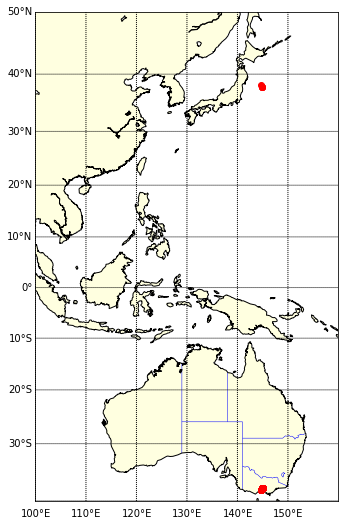

In [6]:
fig = plt.figure(figsize = (12,9))
m = Basemap(projection='mill',
           llcrnrlat=-40,
           urcrnrlat=50,
           llcrnrlon=100,
           urcrnrlon=160,
           resolution='l')
m.drawstates(color='blue')
m.drawcoastlines()
m.drawlsmask(land_color = 'lightyellow')
m.drawparallels(np.arange(-40,70,10), labels = [1,0,0,0])
m.drawmeridians(np.arange(100,160,10), labels = [0,0,0,1])

x,y = m(orig_longs, orig_lats)
m.plot(x,y,'ro')

plt.show()

#### As we can see, there are certain uber rides that have been erroneously marked.

using the `describe` function, we can see the 5-point summary for Latitude

In [7]:
data['Origin Latitude'].describe()

count    297.000000
mean     -36.564733
std        9.759886
min      -38.110916
25%      -37.822794
50%      -37.814968
75%      -37.806231
max       38.110916
Name: Origin Latitude, dtype: float64

#### As we can see, there are positive Latitudes, which is should not be the case, because Victoria, in Australia should all have negetive latitudes. We need to change these positive latitudes to negetive

In [8]:
data[data['Origin Latitude'] > 0]['Origin Latitude']

51    37.861835
54    38.110916
59    37.861835
61    37.823790
65    37.800945
Name: Origin Latitude, dtype: float64

Now that we have confirmed the existence of the positive latitudes, we can apply a `lambda` function which converts all occurrences of a positive latitude to negative. This solves the problem of the positive latitudes 

In [9]:
new_orig_lats = data['Origin Latitude'].apply(lambda x: -x if x > 0 else x)

The same is done for `Destination Latitudes`

In [10]:
dest_lats = list(data['Destination Latitude'])

In [11]:
dest_longs = list(data['Destination Longitude'])

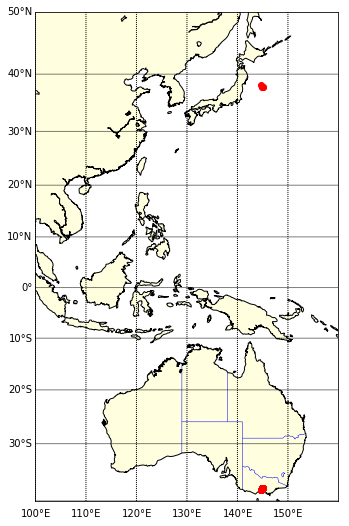

In [12]:
fig = plt.figure(figsize = (12,9))
m = Basemap(projection='mill',
           llcrnrlat=-40,
           urcrnrlat=50,
           llcrnrlon=100,
           urcrnrlon=160,
           resolution='l')
m.drawstates(color='blue')
m.drawcoastlines()
m.drawlsmask(land_color = 'lightyellow')
m.drawparallels(np.arange(-40,70,10), labels = [1,0,0,0])
m.drawmeridians(np.arange(100,160,10), labels = [0,0,0,1])

x,y = m(dest_longs, dest_lats)
m.plot(x,y,'ro')

plt.show()

In [13]:
data['Destination Latitude'].describe()

count    297.000000
mean     -36.581099
std        9.759208
min      -38.110916
25%      -37.824387
50%      -37.815834
75%      -37.807202
max       38.110916
Name: Destination Latitude, dtype: float64

In [14]:
data[data['Origin Latitude'] > 0]['Origin Latitude']

51    37.861835
54    38.110916
59    37.861835
61    37.823790
65    37.800945
Name: Origin Latitude, dtype: float64

In [15]:
new_dest_lats = data['Destination Latitude'].apply(lambda x: -x if x > 0 else x)

In [16]:
updates = pd.DataFrame({'Origin Latitude':new_orig_lats, 'Destination Latitude':new_dest_lats})

In [17]:
data.update(updates)

In [18]:
data[data['Origin Latitude'] > 0]['Origin Latitude']

Series([], Name: Origin Latitude, dtype: float64)

In [19]:
data[data['Destination Latitude'] > 0]['Destination Latitude']

Series([], Name: Destination Latitude, dtype: float64)

The above checks confirm that our errors have been fixed and no more positive latitudes exist. We can now move on to the next type of error - `Uber Type`

## Uber Type Errors

According to the assignment specifications:

* `Uber Type` is a categorical attribute for the type of the Uber : UberPool, UberX, UberBlack.

They are given the values of 0, 1, and 2 respectively in the file. 
However Inspecting the column, reveals that there are entries for `Uber Type 3` also, which is an Error.

In [20]:
data.rename(columns={'Unnamed: 0': 'UberTypeID'}, inplace=True)

In [ ]:
sns.countplot(data['Uber Type'])
data['Uber Type'].value_counts()

In [21]:
data

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1893026173,0,4,2,-37.802095,145.001910,-37.822191,144.947664,6032.2,2018-05-11,22:55:01,1591.68,23:21:32,17.40
1,ID1413308910,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-04-17,11:37:39,5320.68,13:06:19,13.76
2,ID3500490202,1,3,2,-37.819521,144.969726,-37.823998,144.942607,2621.0,2018-01-06,13:42:23,783.60,13:55:26,15.68
3,ID1236801028,0,3,6,-37.813188,144.990376,-37.790797,144.985865,3137.9,2018-04-10,11:43:20,873.66,11:57:53,7.62
4,ID1396126321,0,3,9,-37.819126,144.977767,-38.110916,144.654173,44856.0,2018-06-14,09:56:25,10782.60,12:56:07,23.13
5,ID3974170793,1,1,2,-37.814916,144.935406,-37.819381,144.941667,1867.0,2018-05-03,03:48:00,459.36,3:55:39,15.42
6,ID1898484327,0,4,7,-37.805645,144.995251,-37.861835,144.905716,11040.0,2018-06-11,19:00:57,3612.42,20:01:09,15.00
7,ID3681385419,1,2,5,-37.809697,144.938704,-37.796817,144.931189,2399.7,2018-04-10,20:13:29,615.36,20:23:44,12.82
8,ID1203142621,0,6,8,-37.773845,144.983689,-37.807202,145.026637,8610.0,2018-01-18,05:24:00,1995.72,5:57:15,17.52
9,ID1199540039,0,7,1,-37.861835,144.905716,-37.819847,144.961453,7576.0,2018-07-20,15:32:03,2674.32,16:16:37,13.53


There also seems to be a relationship between Uber Types and the IDs:

* UberTypeIDs that start with ID1 belong to Uber Type 0
* UberTypeIDs that start with ID3 belong to Uber Type 1
* UberTypeIDs that start with ID5 belong to Uber Type 2

There seem to be some discrepancies with this pattern, and thus, they have to be cleaned.

In [22]:
data['Uber Type'].unique()

array([0, 1, 2, 3], dtype=int64)

### There shouldn't be a type 3 in `Uber Type`, since we have Type 0 - Pool, Type 1 - UberX, Type 2- Uber Black

### Uber Type ID 1 is set to Uber Type 0

In [23]:
data[data['UberTypeID'].str.startswith('ID1') == True].shape[0]
#Total number of UberTypeIDs that start with ID1

147

In [24]:
data.loc[(data['UberTypeID'].str.startswith('ID1')) & (data['Uber Type'] == 0)]
#Correct Type 0s, leave as is

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1893026173,0,4,2,-37.802095,145.001910,-37.822191,144.947664,6032.2,2018-05-11,22:55:01,1591.68,23:21:32,17.40
1,ID1413308910,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-04-17,11:37:39,5320.68,13:06:19,13.76
3,ID1236801028,0,3,6,-37.813188,144.990376,-37.790797,144.985865,3137.9,2018-04-10,11:43:20,873.66,11:57:53,7.62
4,ID1396126321,0,3,9,-37.819126,144.977767,-38.110916,144.654173,44856.0,2018-06-14,09:56:25,10782.60,12:56:07,23.13
6,ID1898484327,0,4,7,-37.805645,144.995251,-37.861835,144.905716,11040.0,2018-06-11,19:00:57,3612.42,20:01:09,15.00
8,ID1203142621,0,6,8,-37.773845,144.983689,-37.807202,145.026637,8610.0,2018-01-18,05:24:00,1995.72,5:57:15,17.52
9,ID1199540039,0,7,1,-37.861835,144.905716,-37.819847,144.961453,7576.0,2018-07-20,15:32:03,2674.32,16:16:37,13.53
12,ID1378730709,0,9,3,-38.110916,144.654173,-37.823047,144.976359,44823.0,2018-01-05,23:01:49,10814.82,2:02:03,30.80
13,ID1612576352,0,3,7,-37.814167,144.972320,-37.861835,144.905716,8450.0,2018-01-07,18:32:04,2896.08,19:20:20,16.20
16,ID1171596038,0,8,1,-37.815834,145.046450,-37.804749,144.949398,8695.0,2018-03-20,00:12:18,2505.96,0:54:03,16.88


In [25]:
data[(data['UberTypeID'].str.startswith('ID1')) & (data['Uber Type'] == 1)]
#Wrong Type 1's - replace uber type 1 with uber type 0

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
122,ID1479590303,1,1,8,-37.801638,144.969053,-37.807202,145.026637,5593.0,2018-05-12,11:53:36,1449.54,12:17:45,8.32
123,ID1819180275,1,6,1,-37.790818,144.985793,-37.809288,144.972251,2874.0,2018-01-24,13:31:17,731.64,13:43:28,9.76
124,ID1259834617,1,3,2,-37.818545,144.996100,-37.824387,144.943728,5068.0,2018-05-16,01:15:03,1223.70,1:35:26,17.05
133,ID1403555595,1,3,7,-37.819391,144.985169,-37.861835,144.905716,9219.0,2018-04-11,04:38:21,3015.66,5:28:36,19.87
138,ID1291365240,1,2,1,-37.823133,144.951741,-37.818948,144.952046,670.0,2018-07-04,15:34:20,167.16,15:37:07,10.62


In [26]:
data.loc[data['UberTypeID'].str.startswith('ID1') == True, 'Uber Type'] = \
data.loc[data['UberTypeID'].str.startswith('ID1') == True, 'Uber Type'].map(lambda x: 0 if x==1 or x==2 or x==3 else x)

In [27]:
data.loc[(data['UberTypeID'].str.startswith('ID1')) & (data['Uber Type'] == 0)]

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1893026173,0,4,2,-37.802095,145.001910,-37.822191,144.947664,6032.2,2018-05-11,22:55:01,1591.68,23:21:32,17.40
1,ID1413308910,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,2018-04-17,11:37:39,5320.68,13:06:19,13.76
3,ID1236801028,0,3,6,-37.813188,144.990376,-37.790797,144.985865,3137.9,2018-04-10,11:43:20,873.66,11:57:53,7.62
4,ID1396126321,0,3,9,-37.819126,144.977767,-38.110916,144.654173,44856.0,2018-06-14,09:56:25,10782.60,12:56:07,23.13
6,ID1898484327,0,4,7,-37.805645,144.995251,-37.861835,144.905716,11040.0,2018-06-11,19:00:57,3612.42,20:01:09,15.00
8,ID1203142621,0,6,8,-37.773845,144.983689,-37.807202,145.026637,8610.0,2018-01-18,05:24:00,1995.72,5:57:15,17.52
9,ID1199540039,0,7,1,-37.861835,144.905716,-37.819847,144.961453,7576.0,2018-07-20,15:32:03,2674.32,16:16:37,13.53
12,ID1378730709,0,9,3,-38.110916,144.654173,-37.823047,144.976359,44823.0,2018-01-05,23:01:49,10814.82,2:02:03,30.80
13,ID1612576352,0,3,7,-37.814167,144.972320,-37.861835,144.905716,8450.0,2018-01-07,18:32:04,2896.08,19:20:20,16.20
16,ID1171596038,0,8,1,-37.815834,145.046450,-37.804749,144.949398,8695.0,2018-03-20,00:12:18,2505.96,0:54:03,16.88


### Uber Type ID 3 is set to Uber Type 1

In [28]:
data[data['UberTypeID'].str.startswith('ID3') == True].shape[0]

108

In [29]:
data.loc[(data['UberTypeID'].str.startswith('ID3')) & (data['Uber Type'] == 0)]

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


In [30]:
data.loc[(data['UberTypeID'].str.startswith('ID3')) & (data['Uber Type'] == 1)]

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
2,ID3500490202,1,3,2,-37.819521,144.969726,-37.823998,144.942607,2621.0,2018-01-06,13:42:23,783.60,13:55:26,15.68
5,ID3974170793,1,1,2,-37.814916,144.935406,-37.819381,144.941667,1867.0,2018-05-03,03:48:00,459.36,3:55:39,15.42
7,ID3681385419,1,2,5,-37.809697,144.938704,-37.796817,144.931189,2399.7,2018-04-10,20:13:29,615.36,20:23:44,12.82
10,ID3749844446,1,9,6,-38.110916,144.654173,-37.787433,144.980377,47039.1,2018-04-25,04:36:53,11355.66,7:46:08,63.51
14,ID3863066671,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-01-18,18:48:00,4911.60,20:09:51,28.82
22,ID3494612031,1,3,8,-37.821273,144.983562,-37.815834,145.046450,6486.0,2018-04-01,18:53:03,1918.14,19:25:01,21.05
25,ID3745177908,1,3,1,-37.822181,144.995681,-37.816293,144.958428,3782.0,2018-05-10,12:21:09,901.14,12:36:10,14.23
27,ID3759273504,1,7,5,-37.861835,144.905716,-37.798917,144.935682,11325.0,2018-02-15,09:39:14,3718.80,10:41:12,20.84
28,ID3437301499,1,8,2,-37.815834,145.046450,-37.821504,144.945637,9498.0,2018-07-16,00:21:33,2731.14,1:07:04,25.27
29,ID3379119915,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-07-03,07:48:15,4911.60,9:10:06,26.28


In [31]:
data.loc[(data['UberTypeID'].str.startswith('ID3')) & (data['Uber Type'] == 2)]


,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$


In [32]:
data.loc[(data['UberTypeID'].str.startswith('ID3')) & (data['Uber Type'] == 3)]


,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
134,ID3763253364,3,3,4,-37.824268,144.970044,-37.80873,145.004482,4552.0,2018-02-05,05:23:27,1114.62,5:42:01,17.59


In [33]:
data.loc[data['UberTypeID'].str.startswith('ID3') == True, 'Uber Type'] = \
data.loc[data['UberTypeID'].str.startswith('ID3') == True, 'Uber Type'].map(lambda x: 1 if x==0 or x==2 or x==3 else x)

In [34]:
data[data['UberTypeID'].str.startswith('ID3') == True].shape[0]

108

In [35]:
data.loc[(data['UberTypeID'].str.startswith('ID3')) & (data['Uber Type'] == 1)]

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
2,ID3500490202,1,3,2,-37.819521,144.969726,-37.823998,144.942607,2621.0,2018-01-06,13:42:23,783.60,13:55:26,15.68
5,ID3974170793,1,1,2,-37.814916,144.935406,-37.819381,144.941667,1867.0,2018-05-03,03:48:00,459.36,3:55:39,15.42
7,ID3681385419,1,2,5,-37.809697,144.938704,-37.796817,144.931189,2399.7,2018-04-10,20:13:29,615.36,20:23:44,12.82
10,ID3749844446,1,9,6,-38.110916,144.654173,-37.787433,144.980377,47039.1,2018-04-25,04:36:53,11355.66,7:46:08,63.51
14,ID3863066671,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-01-18,18:48:00,4911.60,20:09:51,28.82
22,ID3494612031,1,3,8,-37.821273,144.983562,-37.815834,145.046450,6486.0,2018-04-01,18:53:03,1918.14,19:25:01,21.05
25,ID3745177908,1,3,1,-37.822181,144.995681,-37.816293,144.958428,3782.0,2018-05-10,12:21:09,901.14,12:36:10,14.23
27,ID3759273504,1,7,5,-37.861835,144.905716,-37.798917,144.935682,11325.0,2018-02-15,09:39:14,3718.80,10:41:12,20.84
28,ID3437301499,1,8,2,-37.815834,145.046450,-37.821504,144.945637,9498.0,2018-07-16,00:21:33,2731.14,1:07:04,25.27
29,ID3379119915,1,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-07-03,07:48:15,4911.60,9:10:06,26.28


### Uber Type ID 5 is set to Uber Type 2

In [36]:
data[data['UberTypeID'].str.startswith('ID5') == True].shape[0]

42

In [37]:
data.loc[(data['UberTypeID'].str.startswith('ID5')) & (data['Uber Type'] == 0)].shape[0]

0

In [38]:
data.loc[(data['UberTypeID'].str.startswith('ID5')) & (data['Uber Type'] == 1)].shape[0]

0

In [39]:
data.loc[(data['UberTypeID'].str.startswith('ID5')) & (data['Uber Type'] == 2)].shape[0]

42

In [41]:
data['Uber Type'].unique()

array([0, 1, 2], dtype=int64)

The above check determines that we have cleaned out `Uber Type` column

# Date Errors

In [43]:
# dates are taken into a list
dates = data['Departure Date'].tolist()

In [44]:
# The dates from the file are stored in a list
# This list is then used to read the years, months, and days by splicing the string values
# The month is checked to be february, and if so, the max date is set to 28
# Even months like April and June have 30 days, so the max date is set to 30
# In some cases, the month is greater than 12, which is a formatting error, so the day and month were swapped in those cases
# If any of the dates did not have any of these anomalies, they were taken into a string which was then put into a list that 
# holds all the cleaned dates

clean_dates = list()

year = str()
month = str()
day = str()
date = str()
temp = str()

for elem in dates:
    year = int(elem[0:4])
    month = int(elem[5:7])
    day = int(elem[8:])
    
    if month == 2 and day > 28:
        day = 28
        date = str(year)+"-"+str(month)+"-"+str(day)
        clean_dates.append(date)
    elif month == 4 and day > 30:
        day = 30
        date = str(year)+"-"+str(month)+"-"+str(day)
        clean_dates.append(date)
    elif month == 6 and day > 30:
        day = 30
        date = str(year)+"-"+str(month)+"-"+str(day)
        clean_dates.append(date)
    elif month > 12:
        month,day = day, month
        date = str(year)+"-"+str(month)+"-"+str(day)
        clean_dates.append(date)
    else:
        date = str(year)+"-"+str(month)+"-"+str(day)
        clean_dates.append(date)

Once the dates are cleaned, they are taken into the dataframe as a separate column called `Clean_dates`

It is then converted into the `datetime` format using the built-in pandas method `pd.to_datetime`

The column which contained the erroneous dates, `Departure Date`, was then dropped, and the newly created date column is then
renamed to `Departure Dates`

In [46]:
data['Clean_dates'] = clean_dates

In [47]:
data['Clean_dates'] =  pd.to_datetime(data['Clean_dates'], format='%Y-%m-%d')

In [48]:
data.drop('Departure Date', axis = 1,  inplace = True)

In [49]:
data.rename(columns={'Clean_dates':'Departure Date'}, inplace=True)

## Region Errors

The idea behind fixing up regions is basically this:

Every region has a cluster of points inside it, whose aggregation basically defines the region boundaries. Each point inside these regions have their own latitudes and longitude. 

So, to effectively find a central point which can act as the centroid of every region, we can aggregate all the points, and find the means of their latitudes and longitudes. 

There are however, wrongly marked region labels for some of those points. In case the wrongly marked point lies very far away from the rest of the points of its actual region, the large deviation in its latitude and longitude might shift the centroid of its region far away from where it might actually be if the point was correctly labelled.

So, instead of aggregating points by their means, they were aggregated by their medians. Since medians do not get affected much by extreme values, this would allow the centroids to still lie close to where they actually would be for every region.

*Once the region labels are fixed, each point's distance is calculated from all 9 centroids. The centroid to which that particular point has the least distance to, is the region to which it belongs to.*

In [51]:
# the origin and destination latitudes and longitudes are aggregated according to their medians and the aggregated centroids are
# then put into a dictionary, whose key identifies the region label, and whose values are the centroid latitudes and longitudes 
orig_lat_dict = dict(data.groupby('Origin Region')['Origin Latitude'].median())
orig_lon_dict = dict(data.groupby('Origin Region')['Origin Longitude'].median())

dest_lon_dict = dict(data.groupby('Destination Region')['Destination Longitude'].median())
dest_lat_dict = dict(data.groupby('Destination Region')['Destination Latitude'].median())

origin_regions = data['Origin Region'].unique().tolist()
origin_regions = sorted(origin_regions)

destination_regions = data['Destination Region'].unique().tolist()
destination_regions = sorted(destination_regions)

In [52]:
orig_lat_dict

{1: -37.81453265,
 2: -37.81560255,
 3: -37.81978805,
 4: -37.80534655,
 5: -37.806662200000005,
 6: -37.7874325,
 7: -37.8618349,
 8: -37.8158343,
 9: -38.1109156}

In [53]:
dest_lat_dict

{1: -37.814231899999996,
 2: -37.818380499999996,
 3: -37.8173604,
 4: -37.81124570000001,
 5: -37.80880585,
 6: -37.7874421,
 7: -37.8618349,
 8: -37.8158343,
 9: -38.1109156}

In [54]:
orig_lon_dict

{1: 144.9552377,
 2: 144.9398344,
 3: 144.9824987,
 4: 145.00355305,
 5: 144.9320495,
 6: 144.98364660000001,
 7: 144.90571599999998,
 8: 145.04645,
 9: 144.65417250000002}

In [55]:
dest_lon_dict

{1: 144.9601305,
 2: 144.9427556,
 3: 144.98342405,
 4: 145.0068668,
 5: 144.92886620000002,
 6: 144.9836895,
 7: 144.90571599999998,
 8: 145.04645,
 9: 144.65417250000002}

In [56]:
# Made a sorted list for origin regions for easy indexing
origin_regions

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [57]:
# Made a sorted list for destination regions for easy indexing
destination_regions

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [58]:
origin_centres = {}

for region in origin_regions:
    origin_centres[region] = [orig_lat_dict[region], orig_lon_dict[region]]

In [59]:
destination_centres = {}

for region in destination_regions:
    destination_centres[region] = [dest_lat_dict[region], dest_lon_dict[region]]

In [60]:
# The origin centroid dictionary with key value pairing, relating each region label to it's centroid latitude and longitude
origin_centres

{1: [-37.81453265, 144.9552377],
 2: [-37.81560255, 144.9398344],
 3: [-37.81978805, 144.9824987],
 4: [-37.80534655, 145.00355305],
 5: [-37.806662200000005, 144.9320495],
 6: [-37.7874325, 144.98364660000001],
 7: [-37.8618349, 144.90571599999998],
 8: [-37.8158343, 145.04645],
 9: [-38.1109156, 144.65417250000002]}

In [61]:
# The destination centroid dictionary with key value pairing, relating each region label to it's centroid latitude and longitude
destination_centres

{1: [-37.814231899999996, 144.9601305],
 2: [-37.818380499999996, 144.9427556],
 3: [-37.8173604, 144.98342405],
 4: [-37.81124570000001, 145.0068668],
 5: [-37.80880585, 144.92886620000002],
 6: [-37.7874421, 144.9836895],
 7: [-37.8618349, 144.90571599999998],
 8: [-37.8158343, 145.04645],
 9: [-38.1109156, 144.65417250000002]}

In [62]:
# These centroids are then put into the dataframe, 
# Their values were rounded off to 6 decimal places for ease of calculation
for key, value in origin_centres.items():
    data.loc[data['Origin Region'] == key, 'Centroid_orig_lat'] = round(value[0], 6)
    data.loc[data['Origin Region'] == key, 'Centroid_orig_lon'] = round(value[1], 6)

In [63]:
# the same was done for the destination region centroids
for key, value in destination_centres.items():
    data.loc[data['Destination Region'] == key, 'Centroid_dest_lat'] = round(value[0], 6)
    data.loc[data['Destination Region'] == key, 'Centroid_dest_lon'] = round(value[1], 6)

#### Since the Earth is not a flat surface, we cannot simply measure distances between 2 points lying on the surface of the earth using Euclidean measures. Thus, a conversion is needed, which is done using the Haversine formula.
#### The distance of every point to it's nearest region's centroid is calculated using the haversine formula. The idea is that once we have figured out the centroid of every region, any point can be classified as lying in a certain region when we calculate its distance from the centroids of every region. 

#### The region it lies in can thus be identified by finding out to which centroid it has the minumum distance to. 

## The Haversine Formula - 
Consider the following:
$$
~R~=~Radius~of~the~Earth\\
\phi_1~=~Latitude~of~point~1\\
\phi_2~=~Latitude~of~point~2\\
\lambda_1~=~Longitude~of~point~1\\
\lambda_2~=~Longitude~of~point~2\\
$$

The distance between any two points, given their coordinates can be calculated using the Haversine Formula.
The haversine function is defined as the following:
$$
a~=~sin^2\bigg(\frac{\phi_2-\phi_1}{2}\bigg) + cos(\phi_1).cos(\phi_2).sin^2\bigg(\frac{\lambda_2-\lambda_1}{2}\bigg)\\
$$

The haversine is then used to map cartesian coordinates to polar coordinates using the `atan2` function
$$
c~=~2.atan2(\sqrt{a},\sqrt{1-a})\\
$$

The distance of the two points is then given by the following, where `d` is the distance:
$$
d~=~R.c
$$

In [64]:
# The haversine function defined here takes 4 arguments: latitudes and longitudes of Point 1 and the latitudes and longitudes of
# point 2. The function then returns the distance between point 1 and point 2 using the conversion explained above
def haversine_dist(lat1, lon1, lat2, lon2):
    R = 6378 #radius of the earth in KMs
    
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    
    radLat1 = radians(lat1)
    radLat2 = radians(lat2)
    
    a = (sin(dLat/2)**2)+(cos(radLat1)*cos(radLat2)*(sin(dLon/2)**2))
    
    c = 2*atan2(sqrt(a), sqrt(1-a))
    
    distance = (R*c)*1000 #Distance is in KMs, multiply by 1000 to get meters
    
    return round(distance, 3)

## Assigning Region numbers to every origin and destination point

In [67]:
# the origin latitudes and longitudes are taken into 4 lists
a = data['Origin Latitude'].tolist()
b = data['Origin Longitude'].tolist()

c = data['Destination Latitude'].tolist()
d = data['Destination Longitude'].tolist()

In [68]:
# The origin latitudes and longitudes are taken into lists as well
# these lists will be used to calculate distances from the points to the centroids
e = []
f = []
for i in range(1,10):
    e.append(origin_centres[i][0])
    f.append(origin_centres[i][1])
    
g = []
h = []
for i in range(1,10):
    g.append(destination_centres[i][0])
    h.append(destination_centres[i][1])

Here, all origin points are first iterated over using the lists `a` and `b` which contain their latitudes and longitudes respectively.

For every origin point, the haversine function is used to find its distance from all 9 centroids using the lists `e` and `f` which contain the centroid latitudes and longitudes.

These distances are then stored inside a list, whose `min` is found. The `index + 1` of that gives which region it belongs to.

The corrected destinations are then put into the dataframe.

In [69]:
origRegions = []
for i in range(len(a)):
    #print('i=',i)
    dist_from_centroids = []
    for j in range(len(e)):
        dist_from_centroids.append(haversine_dist(a[i],b[i],e[j],f[j]))
    #print("Region:",dist_from_centroids.index(min(dist_from_centroids))+1)
    origRegions.append(dist_from_centroids.index(min(dist_from_centroids))+1)

The same is done for destination regions as well.

In [71]:
data['Orig_Regions'] = origRegions

### Checking the errors in Origin Regions

In [72]:
data[data['Origin Region'] != data['Orig_Regions']].shape[0]

32

In [73]:
dest_Regions = []
for i in range(len(c)):
    #print('i=',i)
    dist_from_centroids = []
    for j in range(len(g)):
        dist_from_centroids.append(haversine_dist(c[i],d[i],g[j],h[j]))
    #print("Region:",dist_from_centroids.index(min(dist_from_centroids))+1)
    dest_Regions.append(dist_from_centroids.index(min(dist_from_centroids))+1)

In [74]:
data['Dest_Regions'] = dest_Regions

### Checking the number of errors in Destination Regions

In [75]:
data[data['Destination Region'] != data['Dest_Regions']].shape[0]

38

## Errors in Destination Regions

![image.png](errorsdest.png)

## Fixed Destination Regions

![image.png](DestinationRegionsFixed.png)

## Errors in Origin Regions

![image.png](ErrorOrigRegions.png)

## Fixed Origin Regions

![image.png](FixedOrigRegions.png)

# Errors in Departure Times, Arrival Times, and Travel Times

## Making the graph of the Road network using the `edges.csv` file

Before getting to the Departure Times, Arrival Times and Travel Times, the road network described in the `edges.csv` file and `nodes.csv` file was made using the `NetworkX` module.

This network was stored in a variable. This gives us the shortest paths between any 2 Nodes using the `Dijkstra Algorithm` which functions by returning the shortest path considering distance and weights of the paths.

The weights in our case is taken as the distance in meters between the actual geographic locations of the nodes. 

The paths between the nodes have been given a `street type` which determine what the `speed` on that particular path would be. 

Cars have been assumed to travel these paths at these given speeds at a constant rate.

So for any given pair of nodes, the time taken to traverse the paths would incorporate all the nodes lying in between, the type of street and thus the speed of traversal. The distance of that path would then allow us to calculate the time of traversal by dividing it with its corresponding speed.

This is what happens in the `traveltime` function defined later on, which is used to calculate the time taken to travel any shortest path returned by the `Dijkstra` algorithm.

As for the Departure and Arrival times, we have to make sure that the Departure times are all before the Arrival times, since a car cannot travel back in time. 

As such all dates are taken in datetime formats using the `time` module, and compared.

One important aspect of this validation is that `Departure time - Arrival time = Travel Time`

In [76]:
#Edges dataframe is made from the edges.csv file
edges = pd.read_csv('edges.csv', sep=',')
edges.rename(columns={'Unnamed: 0': 'NodeID'}, inplace=True)
edges.head()

,NodeID,u,v,distance(m),street type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [77]:
# The Graph object is stored inside G
# G has a dictionary structure with all nodes and their connections stored inside it, with their distances as weights
G = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])
G[711327755]

AtlasView({711332946: {'distance(m)': 58.0}, 55725841: {'distance(m)': 15.0}, 711327760: {'distance(m)': 165.0}})

In [78]:
#nodes is then read into a separate dataframe
nodes = pd.read_csv('nodes.csv', sep=',')
nodes.rename(columns={'Unnamed: 0': 'NodeID'}, inplace=True)
nodes.head()

,NodeID,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [80]:
# The original dataframe is merged with the nodes dataframe, wrt Origin Latitudes and longitudes first
# and then the with destination latitudes and longitudes
# This gives us the final dataframe which contains details about origin and destination IDs with their latitudes and longitudes
data_orig_nodes = data.merge(nodes, left_on=['Origin Latitude','Origin Longitude'], right_on=['lat','lon'], how = 'left')

In [81]:
data_orig_nodes.rename(columns={'lat': 'orig_lat', 'lon':'orig_lon'}, inplace=True)
data_orig_nodes

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Time,...,Departure Date,Centroid_orig_lat,Centroid_orig_lon,Centroid_dest_lat,Centroid_dest_lon,Orig_Regions,Dest_Regions,NodeID,orig_lat,orig_lon
0,ID1893026173,0,4,2,-37.802095,145.001910,-37.822191,144.947664,6032.2,22:55:01,...,2018-05-11,-37.805347,145.003553,-37.818380,144.942756,4,2,128882422,-37.802095,145.001910
1,ID1413308910,0,7,6,-37.861835,144.905716,-37.773803,144.983647,16033.0,11:37:39,...,2018-04-17,-37.861835,144.905716,-37.787442,144.983690,7,6,1390575046,-37.861835,144.905716
2,ID3500490202,1,3,2,-37.819521,144.969726,-37.823998,144.942607,2621.0,13:42:23,...,2018-01-06,-37.819788,144.982499,-37.818380,144.942756,3,2,49492959,-37.819521,144.969726
3,ID1236801028,0,3,6,-37.813188,144.990376,-37.790797,144.985865,3137.9,11:43:20,...,2018-04-10,-37.819788,144.982499,-37.787442,144.983690,3,6,681285055,-37.813188,144.990376
4,ID1396126321,0,3,9,-37.819126,144.977767,-38.110916,144.654173,44856.0,09:56:25,...,2018-06-14,-37.819788,144.982499,-38.110916,144.654173,3,9,266739118,-37.819126,144.977767
5,ID3974170793,1,1,2,-37.814916,144.935406,-37.819381,144.941667,1867.0,03:48:00,...,2018-05-03,-37.814533,144.955238,-37.818380,144.942756,2,2,709973349,-37.814916,144.935406
6,ID1898484327,0,4,7,-37.805645,144.995251,-37.861835,144.905716,11040.0,19:00:57,...,2018-06-11,-37.805347,145.003553,-37.861835,144.905716,4,7,583473314,-37.805645,144.995251
7,ID3681385419,1,2,5,-37.809697,144.938704,-37.796817,144.931189,2399.7,20:13:29,...,2018-04-10,-37.815603,144.939834,-37.808806,144.928866,2,5,641030470,-37.809697,144.938704
8,ID1203142621,0,6,8,-37.773845,144.983689,-37.807202,145.026637,8610.0,05:24:00,...,2018-01-18,-37.787432,144.983647,-37.815834,145.046450,6,4,2455254499,-37.773845,144.983689
9,ID1199540039,0,7,1,-37.861835,144.905716,-37.819847,144.961453,7576.0,15:32:03,...,2018-07-20,-37.861835,144.905716,-37.814232,144.960130,7,1,1390575046,-37.861835,144.905716


In [82]:
data_nodes = data_orig_nodes.merge(nodes, left_on=['Destination Latitude','Destination Longitude'], right_on=['lat','lon'], how = 'left')

In [83]:
data_nodes.rename(columns={'NodeID_x':'Origin_Node_ID', 'NodeID_y':'Destination_Node_ID', 'lat': 'dest_lat', 'lon':'dest_lon'}, inplace=True)
#data_nodes

### `data_nodes` is the final data frame which will be used to calculate journey distances and times

# Fixing the dataframe up

In [84]:
data_nodes.drop(columns = ['orig_lat', 'orig_lon', 'dest_lat', 'dest_lon', 'Origin Region', 'Destination Region'], inplace = True)

In [85]:
data_nodes.rename(columns = {'Orig_Regions': 'Origin Region', 'Dest_Regions':'Destination Region', 'Centroid_orig_lat':'Centroid Latitude', 'Centroid_orig_lon': 'Centroid Longitude'}, inplace = True)

,UberTypeID,Uber Type,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Time,Travel Time(s),Arrival Time,Fare$,Departure Date,Centroid Latitude,Centroid Longitude,Centroid_dest_lat,Centroid_dest_lon,Origin Region,Destination Region,Origin_Node_ID,Destination_Node_ID
0,ID1893026173,0,-37.802095,145.001910,-37.822191,144.947664,6032.2,22:55:01,1591.68,23:21:32,17.40,2018-05-11,-37.805347,145.003553,-37.818380,144.942756,4,2,128882422,122817608
1,ID1413308910,0,-37.861835,144.905716,-37.773803,144.983647,16033.0,11:37:39,5320.68,13:06:19,13.76,2018-04-17,-37.861835,144.905716,-37.787442,144.983690,7,6,1390575046,2455254505
2,ID3500490202,1,-37.819521,144.969726,-37.823998,144.942607,2621.0,13:42:23,783.60,13:55:26,15.68,2018-01-06,-37.819788,144.982499,-37.818380,144.942756,3,2,49492959,3281799246
3,ID1236801028,0,-37.813188,144.990376,-37.790797,144.985865,3137.9,11:43:20,873.66,11:57:53,7.62,2018-04-10,-37.819788,144.982499,-37.787442,144.983690,3,6,681285055,4307007286
4,ID1396126321,0,-37.819126,144.977767,-38.110916,144.654173,44856.0,09:56:25,10782.60,12:56:07,23.13,2018-06-14,-37.819788,144.982499,-38.110916,144.654173,3,9,266739118,5002706670
5,ID3974170793,1,-37.814916,144.935406,-37.819381,144.941667,1867.0,03:48:00,459.36,3:55:39,15.42,2018-05-03,-37.814533,144.955238,-37.818380,144.942756,2,2,709973349,5457965889
6,ID1898484327,0,-37.805645,144.995251,-37.861835,144.905716,11040.0,19:00:57,3612.42,20:01:09,15.00,2018-06-11,-37.805347,145.003553,-37.861835,144.905716,4,7,583473314,1390575046
7,ID3681385419,1,-37.809697,144.938704,-37.796817,144.931189,2399.7,20:13:29,615.36,20:23:44,12.82,2018-04-10,-37.815603,144.939834,-37.808806,144.928866,2,5,641030470,123348403
8,ID1203142621,0,-37.773845,144.983689,-37.807202,145.026637,8610.0,05:24:00,1995.72,5:57:15,17.52,2018-01-18,-37.787432,144.983647,-37.815834,145.046450,6,4,2455254499,304700558
9,ID1199540039,0,-37.861835,144.905716,-37.819847,144.961453,7576.0,15:32:03,2674.32,16:16:37,13.53,2018-07-20,-37.861835,144.905716,-37.814232,144.960130,7,1,1390575046,591393797


# Check if Departure Time is Greater than Arrival Time

In [86]:
import time
import datetime as dt

In [87]:
formatted_travel_time = time.strftime('%H:%M:%S', time.gmtime(data_nodes['Travel Time(s)'][0]))

In [88]:
dt.timedelta()

datetime.timedelta(0)

In [89]:
data_nodes[data_nodes['Departure Time'] > data_nodes['Arrival Time']]

,UberTypeID,Uber Type,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Time,Travel Time(s),Arrival Time,Fare$,Departure Date,Centroid Latitude,Centroid Longitude,Centroid_dest_lat,Centroid_dest_lon,Origin Region,Destination Region,Origin_Node_ID,Destination_Node_ID
45,ID5483369397,2,-37.790797,144.985865,-37.802242,144.932876,6115.0,23:49:21,1706.94,0:17:47,183.97,2018-07-24,-37.787432,144.983647,-37.808806,144.928866,6,5,4307007286,583063751
106,ID3686574482,1,-37.814968,144.927521,-37.802558,144.976660,6077.0,23:53:51,1538.22,0:19:29,22.68,2018-07-14,-37.806662,144.932050,-37.814232,144.960130,5,3,6197209884,2457712019
113,ID1884855799,0,-37.821478,144.969345,-37.815212,144.927553,5004.0,17:55:02,1074.36,0:14:05,9.90,2018-02-08,-37.819788,144.982499,-37.808806,144.928866,3,5,846569965,4754200377
151,ID1882738240,0,-37.816268,144.937225,-37.806463,144.972071,3479.0,20:50:42,909.42,20:35:33,11.31,2018-04-27,-37.815603,144.939834,-37.814232,144.960130,2,1,1560149520,371972623
152,ID5879537870,2,-37.814050,144.944740,-37.815834,145.046450,9252.0,5:53:53,2654.58,05:09:39,281.62,2018-06-02,-37.815603,144.939834,-37.815834,145.046450,2,8,1132069636,1889485053
155,ID1303156733,0,-37.820159,144.966941,-37.811246,145.000438,3746.0,19:34:28,984.54,19:18:04,11.93,2018-03-21,-37.814533,144.955238,-37.811246,145.006867,1,4,664378468,420022679
159,ID3482848537,1,-37.801241,144.996793,-37.818903,144.947178,5692.0,9:05:08,1368.84,08:42:20,10.86,2018-05-03,-37.805347,145.003553,-37.818380,144.942756,4,2,2347267466,92141618
161,ID3733460916,1,-37.861835,144.905716,-37.814507,144.999935,10915.0,3:27:40,3492.06,02:29:28,32.29,2018-03-17,-37.861835,144.905716,-37.811246,145.006867,7,4,1390575046,4315827371
168,ID3685495292,1,-37.861835,144.905716,-37.814284,145.002352,11172.0,19:38:27,3559.74,18:39:08,25.85,2018-04-18,-37.861835,144.905716,-37.811246,145.006867,7,4,1390575046,309346765
170,ID1369157829,0,-37.799655,144.937124,-37.823318,145.009236,8391.0,1:00:54,2146.38,00:25:08,17.75,2018-03-06,-37.806662,144.932050,-37.817360,144.983424,5,4,4807112219,260907235


In [90]:
data_nodes['Dep_time'] = pd.to_timedelta(data_nodes['Departure Time'])

In [91]:
data_nodes['Arr_time'] = pd.to_timedelta(data_nodes['Arrival Time'])

In [92]:
data_nodes[data_nodes['Dep_time'] > data_nodes['Arr_time']]

,UberTypeID,Uber Type,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Time,Travel Time(s),Arrival Time,...,Centroid Latitude,Centroid Longitude,Centroid_dest_lat,Centroid_dest_lon,Origin Region,Destination Region,Origin_Node_ID,Destination_Node_ID,Dep_time,Arr_time
12,ID1378730709,0,-38.110916,144.654173,-37.823047,144.976359,44823.0,23:01:49,10814.82,2:02:03,...,-38.110916,144.654173,-37.817360,144.983424,9,3,5002706670,6282174153,23:01:49,02:02:03
45,ID5483369397,2,-37.790797,144.985865,-37.802242,144.932876,6115.0,23:49:21,1706.94,0:17:47,...,-37.787432,144.983647,-37.808806,144.928866,6,5,4307007286,583063751,23:49:21,00:17:47
104,ID3154005105,1,-37.807324,144.957385,-37.813734,144.972116,2093.0,23:29:28,534.06,2:13:54,...,-37.814533,144.955238,-37.817360,144.983424,1,1,711331436,6167191150,23:29:28,02:13:54
106,ID3686574482,1,-37.814968,144.927521,-37.802558,144.976660,6077.0,23:53:51,1538.22,0:19:29,...,-37.806662,144.932050,-37.814232,144.960130,5,3,6197209884,2457712019,23:53:51,00:19:29
113,ID1884855799,0,-37.821478,144.969345,-37.815212,144.927553,5004.0,17:55:02,1074.36,0:14:05,...,-37.819788,144.982499,-37.808806,144.928866,3,5,846569965,4754200377,17:55:02,00:14:05
114,ID3706530265,1,-37.814858,144.936002,-37.815834,145.046450,10122.0,22:24:31,2829.66,4:51:12,...,-37.815603,144.939834,-37.815834,145.046450,2,8,709978061,1889485053,22:24:31,04:51:12
121,ID3782854553,1,-37.815834,145.046450,-38.110916,144.654173,51032.0,23:05:09,12681.06,2:36:30,...,-37.815834,145.046450,-38.110916,144.654173,8,9,1889485053,5002706670,23:05:09,02:36:30
151,ID1882738240,0,-37.816268,144.937225,-37.806463,144.972071,3479.0,20:50:42,909.42,20:35:33,...,-37.815603,144.939834,-37.814232,144.960130,2,1,1560149520,371972623,20:50:42,20:35:33
152,ID5879537870,2,-37.814050,144.944740,-37.815834,145.046450,9252.0,5:53:53,2654.58,05:09:39,...,-37.815603,144.939834,-37.815834,145.046450,2,8,1132069636,1889485053,05:53:53,05:09:39
155,ID1303156733,0,-37.820159,144.966941,-37.811246,145.000438,3746.0,19:34:28,984.54,19:18:04,...,-37.814533,144.955238,-37.811246,145.006867,1,4,664378468,420022679,19:34:28,19:18:04


There are 3 conditions where there are errors:
1. One where the Departure time is greater than the Arrival time because a ride starts at sometime before midnight and ends after midnight. These are actually correct records, and as such nothing is to be changed here.
2. In some cases the departure times and arrival times have been swapped, which need to be corrected
3. In some cases, the arrival time is completely wrong, in which case the correct arrival time is calculated by adding the departure time and travel time

The algorithm for these are simple:

Take a look at this clock:

<img src="https://i1.wp.com/www.alamandamaths.com/wp-content/uploads/2015/09/Military-Clock-e1498961479203.png?w=1040" style="height:300px">

As is evident, when you need to calculate the traversal time from say 23:00:00 to 00:12:00, you cannot use the difference in times since it gives a difference of about 23 hours. Instead you calculate the difference in time from 23:00:00 to 24:00:00, and then add that up with the time difference between 24:00:00 (00:00:00) and 00:12:00.

In [93]:
# The reported times in the csv file are stored in a list, which will be used to validate the differences in departure
# and arrival times
# A threshold of a couple of seconds is taken for validation between the calculated times and the reported times
# The times are then either left as is, swapped, or re-calculated based on the above logic, depending on what kind of error is
# observed
reported = data_nodes['Travel Time(s)'].tolist()
for i in data_nodes[data_nodes['Dep_time'] > data_nodes['Arr_time']].index:
    difference = (data_nodes['Dep_time'][i] - data_nodes['Arr_time'][i]).seconds
    
    if abs(difference - reported[i]) < 1:
        data_nodes.loc[i, ['Dep_time', 'Arr_time']] = data_nodes.loc[i, ['Arr_time','Dep_time']].values
    
    elif (abs((pd.to_timedelta('23:59:59').seconds - data_nodes['Dep_time'][i].seconds) + (data_nodes['Arr_time'][i].seconds)-reported[i])) < 2:
        continue
    else:
        data_nodes.loc[i,['Arrival Time','Arr_time']] = ((dt.timedelta(seconds = round(data_nodes['Dep_time'][i].seconds + reported[i]))))

In [94]:
# Checking for nulls
data_nodes['Travel Time(s)'].isna().sum()

0

## Checking Calculated Times vs. Reported Times

In [95]:
# For the newly calculated times, if the difference between them and the reported times in the csv file is large,
# The shortest path between their respective origin and destination nodes is calculated
# The times for all the shortes paths are then found using the traveltime function defined below
# The times are then swapped for the values returned from the function

for i in range(len(data_nodes['Dep_time'])):
    if abs((pd.to_timedelta('23:59:59').seconds - data_nodes['Dep_time'][i].seconds) + (data_nodes['Arr_time'][i].seconds)-reported[i]) < 2:
        calc_travel_time = abs((pd.to_timedelta('23:59:59').seconds - data_nodes['Dep_time'][i].seconds) + (data_nodes['Arr_time'][i].seconds))
    
    else:
        calc_travel_time = round(abs((data_nodes['Dep_time'][i] - data_nodes['Arr_time'][i])).seconds, 2)
    
    data_nodes.loc[i,'Calc_travel_time'] = calc_travel_time

In [96]:
data_nodes[abs(data_nodes['Calc_travel_time'] - data_nodes['Travel Time(s)'])>2]

,UberTypeID,Uber Type,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Time,Travel Time(s),Arrival Time,...,Centroid Longitude,Centroid_dest_lat,Centroid_dest_lon,Origin Region,Destination Region,Origin_Node_ID,Destination_Node_ID,Dep_time,Arr_time,Calc_travel_time
78,ID3889231729,1,-37.799622,144.955018,-37.815834,145.046450,8515.0,09:48:51,2409.24,10:28:06,...,144.955238,-37.815834,145.046450,1,8,1281079287,1889485053,09:48:51,10:28:06,2355.0
79,ID3706917744,1,-37.815222,144.944883,-37.813260,144.944790,269.0,02:58:30,170.14,2:59:43,...,144.955238,-37.818380,144.942756,2,2,1621189025,1668523150,02:58:30,02:59:43,73.0
80,ID3964706259,1,-37.813803,145.014300,-37.819160,144.981275,3676.0,10:29:34,980.36,10:45:43,...,145.003553,-37.817360,144.983424,4,3,6222911339,575472747,10:29:34,10:45:43,969.0
84,ID1807874245,0,-37.803919,145.003464,-37.816317,144.970898,3814.0,03:43:32,1068.84,4:00:14,...,145.003553,-37.817360,144.983424,4,1,723967221,6167254938,03:43:32,04:00:14,1002.0
85,ID5503191300,2,-37.773845,144.983689,-37.815834,145.046450,10698.0,02:12:13,2812.46,2:58:09,...,144.983647,-37.815834,145.046450,6,8,2455254499,1889485053,02:12:13,02:58:09,2756.0
87,ID1810998719,0,-37.861835,144.905716,-37.812975,144.935031,11068.0,11:43:03,3542.56,12:42:34,...,144.905716,-37.814232,144.960130,7,5,1390575046,301545281,11:43:03,12:42:34,3571.0
88,ID1191840414,0,-37.790818,144.985793,-37.818219,144.977455,5043.0,00:41:24,1320.26,1:02:25,...,144.983647,-37.817360,144.983424,6,3,4307007287,577458192,00:41:24,01:02:25,1261.0
90,ID1643873319,0,-37.813863,145.009327,-38.110916,144.654173,47933.0,04:29:03,11463.46,7:40:26,...,145.003553,-38.110916,144.654173,4,9,728165741,5002706670,04:29:03,07:40:26,11483.0
91,ID5126862585,2,-37.813579,145.010702,-37.816531,144.986012,2872.0,09:01:26,691.14,9:13:12,...,145.003553,-37.817360,144.983424,4,3,1277988775,6212685640,09:01:26,09:13:12,706.0
92,ID5857730730,2,-37.813040,144.990402,-37.799833,144.939835,5147.0,10:26:22,1312.82,10:47:33,...,144.982499,-37.808806,144.928866,3,5,2774550257,137148242,10:26:22,10:47:33,1271.0


In [97]:
#making data integrity checks
data_nodes['Travel Time(s)'].isna().sum()
data_nodes['Calc_travel_time'].isna().sum()

0

In [98]:
# sources and destinations are taken and their travel times checked against those reported in the csv file
src_list = list()
des_list = list()
travel_time = list()
for i in data_nodes[abs(data_nodes['Calc_travel_time'] - data_nodes['Travel Time(s)'])>2].index:
    src_list.append(data_nodes['Origin_Node_ID'][i])
    des_list.append(data_nodes['Destination_Node_ID'][i])
    travel_time.append(data['Travel Time(s)'][i])

### `traveltime` Function is defined as mentioned:

In [99]:
#the logic for this function has been stated above
# the arguments to this function are all the shortest paths obtained from the dijkstra algorithm, and the edges mentioned in
# the values returned by that function
# this function then returns the time taken to traverse each path
def traveltime(path, edges):
    tt = 0
    
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)

    return tt

In [100]:
#The times are swapped if they dont already exist in the csv file

clean_travel_time = list()

for i in range(len(src_list)):
    src = src_list[i]
    des = des_list[i]
    
    paths = nx.all_shortest_paths(G,source=src, target=des, weight='distance(m)', method='dijkstra')
    p_list = list(paths)

    times_list = list()
    
    for path in p_list:
        times_list.append(round(traveltime(path, edges),2))
    
    for time in times_list:
        if time in travel_time:
            clean_travel_time.append(time)
            break
        if time not in travel_time:
            clean_travel_time.append(min(times_list))
            break

In [101]:
#All the swapped times are then added to the dataframe after being made into a series
clean_travel_time = pd.Series(clean_travel_time)

In [102]:
j = 0
for i in data_nodes[abs(data_nodes['Calc_travel_time'] - data_nodes['Travel Time(s)'])>2].index:
    data_nodes.loc[i,['Travel Time(s)']] = clean_travel_time[j]
    j += 1

In [103]:
data_nodes['Travel Time(s)'].isna().sum()

0

In [104]:
src_list = list()
des_list = list()
travel_time = list()
for i in data_nodes[abs(data_nodes['Calc_travel_time'] - data_nodes['Travel Time(s)'])>2].index:
    src_list.append(data_nodes['Origin_Node_ID'][i])
    des_list.append(data_nodes['Destination_Node_ID'][i])
    travel_time.append(data['Travel Time(s)'][i])

In [105]:
clean_travel_time = list()

for i in range(len(src_list)):
    src = src_list[i]
    des = des_list[i]
    
    paths = nx.all_shortest_paths(G,source=src, target=des, weight='distance(m)', method='dijkstra')
    p_list = list(paths)

    times_list = list()
    
    for path in p_list:
        times_list.append(round(traveltime(path, edges),2))
    
    for time in times_list:
        if time in travel_time:
            clean_travel_time.append(time)
            break
        if time not in travel_time:
            clean_travel_time.append(min(times_list))
            break

In [106]:
clean_travel_time = pd.Series(clean_travel_time)

In [107]:
j = 0
for i in data_nodes[abs(data_nodes['Calc_travel_time'] - data_nodes['Travel Time(s)'])>2].index:
    data_nodes.loc[i,['Travel Time(s)']] = clean_travel_time[j]
    j += 1

In [108]:
data_nodes['Travel Time(s)'].isna().sum()

0

In [109]:
dep_time = list()
arr_time = list()
for i in range(len(data_nodes['Dep_time'])):
    dep_time.append(str(data_nodes['Dep_time'][i])[7:])
    arr_time.append(str(data_nodes['Arr_time'][i])[7:])


In [110]:
data_nodes['Dep_time_1'] = dep_time
data_nodes['Arr_time_1'] = arr_time

,UberTypeID,Uber Type,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Time,Travel Time(s),Arrival Time,...,Centroid_dest_lon,Origin Region,Destination Region,Origin_Node_ID,Destination_Node_ID,Dep_time,Arr_time,Calc_travel_time,Dep_time_1,Arr_time_1
0,ID1893026173,0,-37.802095,145.001910,-37.822191,144.947664,6032.2,22:55:01,1591.68,23:21:32,...,144.942756,4,2,128882422,122817608,22:55:01,23:21:32,1591.0,22:55:01,23:21:32
1,ID1413308910,0,-37.861835,144.905716,-37.773803,144.983647,16033.0,11:37:39,5320.68,13:06:19,...,144.983690,7,6,1390575046,2455254505,11:37:39,13:06:19,5320.0,11:37:39,13:06:19
2,ID3500490202,1,-37.819521,144.969726,-37.823998,144.942607,2621.0,13:42:23,783.60,13:55:26,...,144.942756,3,2,49492959,3281799246,13:42:23,13:55:26,783.0,13:42:23,13:55:26
3,ID1236801028,0,-37.813188,144.990376,-37.790797,144.985865,3137.9,11:43:20,873.66,11:57:53,...,144.983690,3,6,681285055,4307007286,11:43:20,11:57:53,873.0,11:43:20,11:57:53
4,ID1396126321,0,-37.819126,144.977767,-38.110916,144.654173,44856.0,09:56:25,10782.60,12:56:07,...,144.654173,3,9,266739118,5002706670,09:56:25,12:56:07,10782.0,09:56:25,12:56:07
5,ID3974170793,1,-37.814916,144.935406,-37.819381,144.941667,1867.0,03:48:00,459.36,3:55:39,...,144.942756,2,2,709973349,5457965889,03:48:00,03:55:39,459.0,03:48:00,03:55:39
6,ID1898484327,0,-37.805645,144.995251,-37.861835,144.905716,11040.0,19:00:57,3612.42,20:01:09,...,144.905716,4,7,583473314,1390575046,19:00:57,20:01:09,3612.0,19:00:57,20:01:09
7,ID3681385419,1,-37.809697,144.938704,-37.796817,144.931189,2399.7,20:13:29,615.36,20:23:44,...,144.928866,2,5,641030470,123348403,20:13:29,20:23:44,615.0,20:13:29,20:23:44
8,ID1203142621,0,-37.773845,144.983689,-37.807202,145.026637,8610.0,05:24:00,1995.72,5:57:15,...,145.046450,6,4,2455254499,304700558,05:24:00,05:57:15,1995.0,05:24:00,05:57:15
9,ID1199540039,0,-37.861835,144.905716,-37.819847,144.961453,7576.0,15:32:03,2674.32,16:16:37,...,144.960130,7,1,1390575046,591393797,15:32:03,16:16:37,2674.0,15:32:03,16:16:37


Once all the cleaning has been done, the unnecessary columns are dropped, and the clean file then is written to the output file `29819253_dirty_data_solution.csv`

In [111]:
data_nodes.drop(columns = ['Departure Time', 'Arrival Time', 'Calc_travel_time', 'Dep_time', 'Arr_time'], inplace = True)
data_nodes.rename(columns = {'Dep_time_1': 'Departure Time', 'Arr_time_1':'Arrival Time'}, inplace = True)

In [112]:
data_nodes.drop(columns = ['Centroid Latitude', 'Centroid Longitude', 'Origin_Node_ID','Destination_Node_ID'], inplace = True)
data_nodes.drop(columns = ['Centroid_dest_lat', 'Centroid_dest_lon'], inplace = True)

In [113]:
data_nodes = data_nodes[['UberTypeID','Uber Type', 'Origin Region', 'Destination Region', 'Origin Latitude', 'Origin Longitude',\
                'Destination Latitude', 'Destination Longitude','Journey Distance(m)', 'Departure Date', 'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$']]

In [114]:
data_nodes['Travel Time(s)'].isna().sum()

0

In [115]:
data_nodes.shape

(297, 14)

In [117]:
data_nodes.isna().sum()

UberTypeID               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
dtype: int64

In [118]:
header = data_nodes.columns.to_list()
header[0] = ''
data_nodes.to_csv('29819253_dirty_data_solution.csv', index = False, header = header)

# Missing Values

In [119]:
# The Missing Values file is read into a dataframe
missing_set = pd.read_csv("29819253_missing_value.csv")
missing_set.rename(columns = {'Unnamed: 0':'UberTypeID'}, inplace = True)
# The cleaned dirty data file is read into another dataframe
data_set = pd.read_csv("29819253_dirty_data_solution.csv")
data_set.rename(columns = {'Unnamed: 0':'UberTypeID'}, inplace = True)

We need 2 dataframes, one which has missing values, and one that was cleaned earlier.
These dataframes will be used for creating a training set for training our Linear Regression model.

Create the `missing` and `data` datasets for training and testing the models separately first

In [120]:
missing_set.shape

(124, 14)

The dataframe consists of 124 rows and 14 columns

In [121]:
#A combination of missing data and the cleaned data file is used for training the model
train_data = pd.concat([missing_set,data_set]).copy()

In [122]:
missing_set.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,103.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,105.000000
mean,0.679612,4.669355,5.467742,-37.843885,144.932740,-37.861779,144.920367,17352.919355,4471.267258,52.301048
std,0.689040,2.609307,2.605296,0.093699,0.101332,0.108529,0.120895,17253.442551,4113.725584,102.589575
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1559.000000,400.560000,5.620000
25%,0.000000,2.000000,3.000000,-37.823102,144.932436,-37.861835,144.905716,5599.750000,1469.880000,15.260000
50%,1.000000,5.000000,6.000000,-37.814137,144.957614,-37.815834,144.948282,8982.000000,2692.080000,21.480000
75%,1.000000,7.000000,8.000000,-37.803094,144.984064,-37.807228,144.986131,42148.750000,10123.605000,51.120000
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51032.000000,13173.360000,717.790000


In [123]:
missing_set[['Departure Date', 'Departure Time', 'Arrival Time']].shape[0]

124

There are missing values in `Uber Type` and `Fare`

As per the last section where we cleaned the dirty data, `Uber Type` and `UberTypeID` are related. 
1. `UberTypeID`s that start with "ID1" correspond to `Uber Type` of 0
2. `UberTypeID`s that start with "ID3" correspond to `Uber Type` of 1
3. `UberTypeID`s that start with "ID5" correspond to `Uber Type` of 2

In [124]:
#Check the number of missing values in Uber Type
missing_set['Uber Type'].isna().sum()

21

In [125]:
#Check the number of missing values in Fare
missing_set['Fare$'].isna().sum()

19

In [126]:
# Allocate the correct Uber Types for their corresponding UberTypeIDs
missing_set.loc[missing_set['UberTypeID'].str[:3] == 'ID1', "Uber Type"] = 0
missing_set.loc[missing_set['UberTypeID'].str[:3] == 'ID3', "Uber Type"] = 1
missing_set.loc[missing_set['UberTypeID'].str[:3] == 'ID5', "Uber Type"] = 2

In [127]:
len(missing_set['Uber Type'].unique())

3

The above check verifies that we have correctly cleaned the `Uber Type` to having only 3 values

## Check whether the `Uber Type` column has been cleaned

Checking the integrity of columns for "ID1" and Uber Types 

In [129]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID1')) & (missing_set['Uber Type'] == 1)].shape[0]

0

In [130]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID1')) & (missing_set['Uber Type'] == 2)].shape[0]

0

In [131]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID1')) & (missing_set['Uber Type'] == 3)].shape[0]

0

Checking the integrity of columns for "ID3" and Uber Types

In [132]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID3')) & (missing_set['Uber Type'] == 0)].shape[0]

0

In [133]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID3')) & (missing_set['Uber Type'] == 2)].shape[0]

0

In [134]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID3')) & (missing_set['Uber Type'] == 3)].shape[0]

0

Checking the integrity of columns for "ID5" and Uber Types

In [135]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID5')) & (missing_set['Uber Type'] == 0)].shape[0]

0

In [136]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID5')) & (missing_set['Uber Type'] == 1)].shape[0]

0

In [137]:
missing_set[(missing_set['UberTypeID'].str.startswith('ID5')) & (missing_set['Uber Type'] == 3)].shape[0]

0

# Imputation of `Fare` column

In [138]:
import seaborn as sns

A **correlation matrix** is a table showing correlation coefficients between sets of variables. Each random variable in the table is correlated with each of the other values in the table. This allows you to see which pairs have the highest correlation.

This will be useful in identifying which variables to consider as our predictor variables while making the model.

In [139]:
correlation_matrix = missing_set.corr()
correlation_matrix

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
Uber Type,1.000000,0.078446,-0.122262,0.024671,0.053998,0.011953,-0.021128,0.006363,0.002887,0.553132
Origin Region,0.078446,1.000000,0.022935,-0.559039,-0.471485,0.019458,0.008886,0.441539,0.464728,0.120839
Destination Region,-0.122262,0.022935,1.000000,0.050852,-0.002606,-0.588106,-0.467470,0.540277,0.567580,0.164792
Origin Latitude,0.024671,-0.559039,0.050852,1.000000,0.957334,-0.177708,-0.167678,-0.553324,-0.545317,0.028651
Origin Longitude,0.053998,-0.471485,-0.002606,0.957334,1.000000,-0.143421,-0.148908,-0.559728,-0.551875,0.075906
Destination Latitude,0.011953,0.019458,-0.588106,-0.177708,-0.143421,1.000000,0.956591,-0.689443,-0.688802,-0.308768
Destination Longitude,-0.021128,0.008886,-0.467470,-0.167678,-0.148908,0.956591,1.000000,-0.651558,-0.647507,-0.303918
Journey Distance(m),0.006363,0.441539,0.540277,-0.553324,-0.559728,-0.689443,-0.651558,1.000000,0.995753,0.272340
Travel Time(s),0.002887,0.464728,0.567580,-0.545317,-0.551875,-0.688802,-0.647507,0.995753,1.000000,0.279580
Fare$,0.553132,0.120839,0.164792,0.028651,0.075906,-0.308768,-0.303918,0.272340,0.279580,1.000000


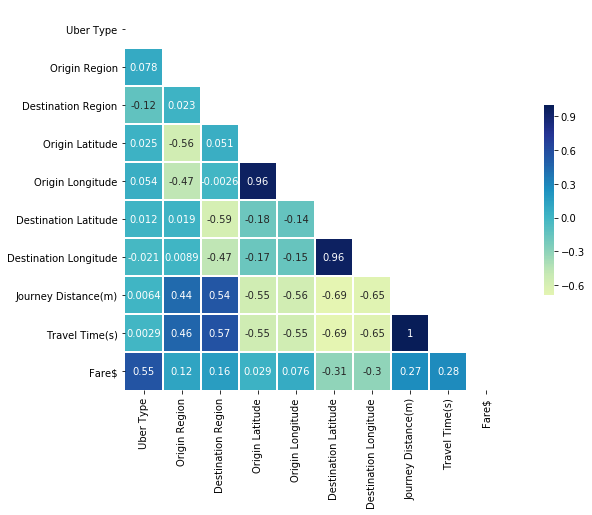

In [140]:
#Let us visualise this using a diagonal heat map

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns.values, yticklabels=correlation_matrix.columns.values, mask=mask, cmap="YlGnBu", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

fig = plt.gcf()
fig.set_size_inches(14, 7, forward=True)

Fare has the highest correlations to `Uber Type`, `Origin Region`, `Destination Region`, `Journey Distance`, and `Travel Time`
If the correlation is lower than 0.2, it makes no sense to consider those features. 
The exact correlations are checked by checking the values from the `correlation_matrix`

In [141]:
correlation_matrix[correlation_matrix['Fare$'] > 0.2]['Fare$']

Uber Type              0.553132
Journey Distance(m)    0.272340
Travel Time(s)         0.279580
Fare$                  1.000000
Name: Fare$, dtype: float64

Seems like `Fare` is correlated to `Uber Types`, `Journey Distance`, and `Travel Times` more so than others.

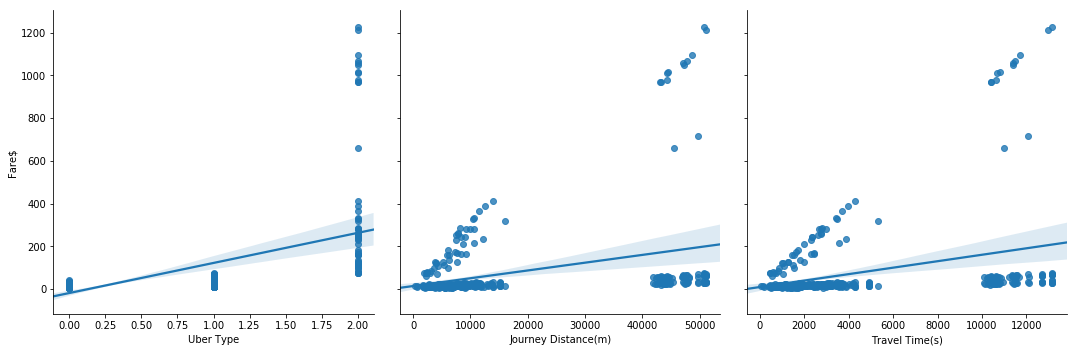

In [142]:
sns.pairplot(train_data, x_vars=['Uber Type', 'Journey Distance(m)','Travel Time(s)'], y_vars='Fare$', kind='reg',height=5)

Evidently, a single regression line is not enough to fully describe the relationships between all 3 `Uber Types`, or the `Journey Distances` and `Travel Times`

We can separate the 3 `Uber Types` and see what the line of best fit would look like for each `Uber Type`

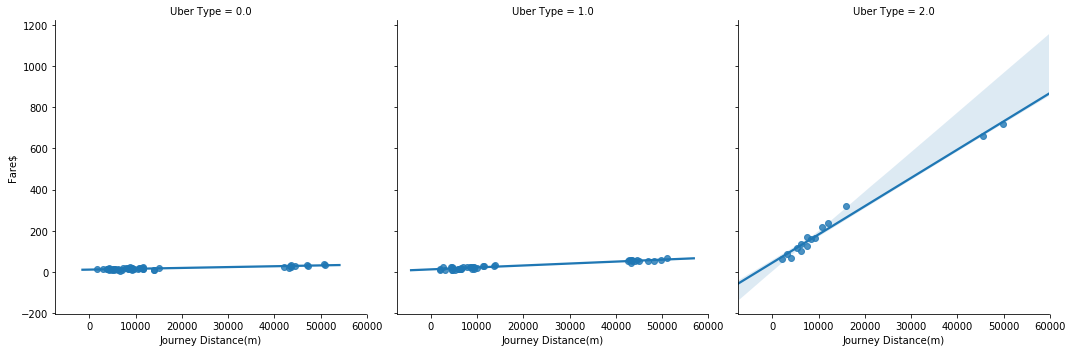

In [143]:
sns.lmplot('Journey Distance(m)','Fare$', col = 'Uber Type', data = missing_set)

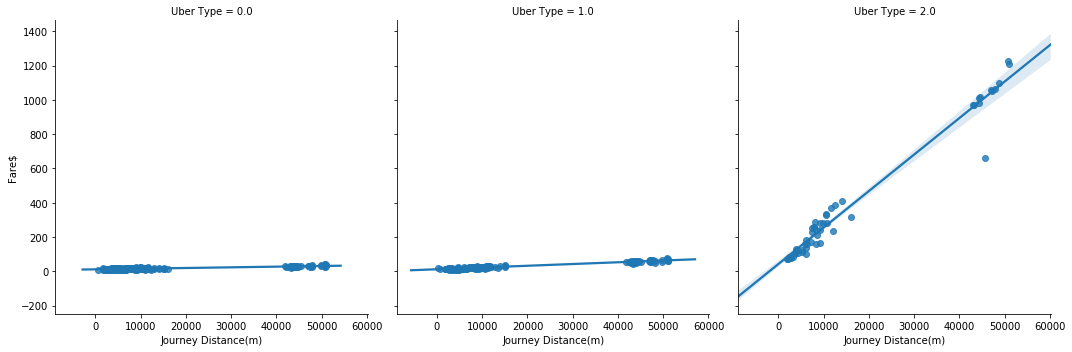

In [144]:
sns.lmplot('Journey Distance(m)','Fare$', col = 'Uber Type',data = train_data)

Clearly, a separate regression model has to be made for all 3 `Uber Types`, to get the line of best fit for `Travel Times` and `Journey Distance`

There seem to be a few outliers in `Uber Type`, which we may need to consider during the modelling stage.

## Making the Categorical Columns

As per the assignment specifications:
1. `Uber Type` is a categorical variable:
                   0 -> Uber Pool
                   1 -> UberX
                   2 -> Uber Black

2. `Departure Date` has to be taken as a categorical variable:
                    0 -> Weekday
                    1 -> Weekend 

3. `Departure Time` has to taken as a categorical variable:
                    0 indicating time of day -> Morning : 06:00:00 to 11:59:00 
                    1 indicating time of day -> Afternoon: 12:00:00 to 20:59:59
                    2 indicating time of day -> Night: After 21:00:00 or Before 5:59:59

#### Inspecting the `Departure Date` column

In [145]:
missing_set['Departure Date'].head()

0    2018-04-04
1    2018-01-24
2    2018-07-03
3    2018-01-05
4    2018-05-24
Name: Departure Date, dtype: object

In [146]:
train_data['Departure Date'].head()

0    2018-04-04
1    2018-01-24
2    2018-07-03
3    2018-01-05
4    2018-05-24
Name: Departure Date, dtype: object

In [147]:
missing_set['Dep_date'] = pd.to_datetime(missing_set.loc[:,'Departure Date'].values)

In [148]:
train_data['Dep_date'] = pd.to_datetime(train_data.loc[:,'Departure Date'].values)

As is evident, the days are listed as integers ranging from `00-31`

`pandas.DatetimeIndex.dayofweek` objects number days according to their position in the week:
    1. Monday -> 0
    2. Tuesday -> 1
    3. Wednesday -> 2
    4. Thursday -> 3
    5. Friday -> 4
    6. Saturday -> 5
    7. Sunday -> 6

Hence for the Departure Dates, if the `day` value lies in the range 0-4 it is classified as `Weekday`, and if it is 5-6 it is classified as `Weekend`

In [149]:
#Trips taken on the weekends
missing_set.iloc[np.where(missing_set['Dep_date'].dt.dayofweek > 4)].head()

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Dep_date
10,ID1680563903,0.0,2,8,-37.813416,144.940074,-37.815834,145.046450,9713.0,2018-07-07,11:14:05,2724.90,11:59:29,14.18,2018-07-07
11,ID1807027243,0.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-07-15,01:51:12,13173.36,5:30:45,40.95,2018-07-15
21,ID3810587240,1.0,3,2,-37.826303,144.979840,-37.824092,144.935298,4571.0,2018-04-28,03:52:01,1138.50,4:10:59,23.57,2018-04-28
27,ID1412791962,0.0,1,8,-37.807087,144.965754,-37.815834,145.046450,7189.0,2018-01-27,16:37:05,2111.88,17:12:16,17.48,2018-01-27
31,ID5627630532,2.0,3,9,-37.824295,144.982148,-38.110916,144.654173,45572.0,2018-07-28,13:32:02,10984.38,16:35:06,659.86,2018-07-28


In [150]:
train_data.iloc[np.where(train_data['Dep_date'].dt.dayofweek > 4)].head()

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Dep_date
10,ID1680563903,0.0,2,8,-37.813416,144.940074,-37.815834,145.046450,9713.0,2018-07-07,11:14:05,2724.90,11:59:29,14.18,2018-07-07
11,ID1807027243,0.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-07-15,01:51:12,13173.36,5:30:45,40.95,2018-07-15
21,ID3810587240,NaN,3,2,-37.826303,144.979840,-37.824092,144.935298,4571.0,2018-04-28,03:52:01,1138.50,4:10:59,23.57,2018-04-28
27,ID1412791962,0.0,1,8,-37.807087,144.965754,-37.815834,145.046450,7189.0,2018-01-27,16:37:05,2111.88,17:12:16,17.48,2018-01-27
31,ID5627630532,2.0,3,9,-37.824295,144.982148,-38.110916,144.654173,45572.0,2018-07-28,13:32:02,10984.38,16:35:06,659.86,2018-07-28


In [151]:
#Assign 1 to Weekends
missing_set.loc[missing_set['Dep_date'].dt.dayofweek > 4, 'Weekend'] = 1

In [152]:
#Assign 1 to Weekends
train_data.loc[train_data['Dep_date'].dt.dayofweek > 4, 'Weekend'] = 1

In [153]:
#Assign 0 to Weekdays
missing_set.loc[missing_set['Dep_date'].dt.dayofweek <= 4, 'Weekend'] = 0

In [154]:
#Assign 0 to Weekdays
train_data.loc[train_data['Dep_date'].dt.dayofweek <= 4, 'Weekend'] = 0

In [155]:
#Check for Nulls in the Weekend categorical column
missing_set['Weekend'].isna().sum()

0

In [156]:
#Check for Nulls in the Weekend categorical column
train_data['Weekend'].isna().sum()

0

#### Inspecting the `Departure Time` column

In [157]:
missing_set['Departure Time'].head()

0    03:50:38
1    11:25:40
2    19:11:08
3    23:32:35
4    08:59:46
Name: Departure Time, dtype: object

In [158]:
train_data['Departure Time'].head()

0    03:50:38
1    11:25:40
2    19:11:08
3    23:32:35
4    08:59:46
Name: Departure Time, dtype: object

In [159]:
missing_set['Dep_time'] = pd.to_datetime(missing_set.loc[:,'Departure Time'].values, format = '%H:%M:%S')
missing_set['Dep_time'].head()

0   1900-01-01 03:50:38
1   1900-01-01 11:25:40
2   1900-01-01 19:11:08
3   1900-01-01 23:32:35
4   1900-01-01 08:59:46
Name: Dep_time, dtype: datetime64[ns]

In [160]:
train_data['Dep_time'] = pd.to_datetime(train_data.loc[:,'Departure Time'].values, format = '%H:%M:%S')
train_data['Dep_time'].head()

0   1900-01-01 03:50:38
1   1900-01-01 11:25:40
2   1900-01-01 19:11:08
3   1900-01-01 23:32:35
4   1900-01-01 08:59:46
Name: Dep_time, dtype: datetime64[ns]

As is evident, the hours are listed as integers ranging from `00-24`

`pandas.Series.DatetimeIndex.hour` objects take `hour` values as it is

Hence for the Departure Times, if the `hour` value lies in the range 6-11 it is classified as `Morning`, if it is 12-20 it is classified as `Afternoon`, and if it is 21-24, or 0-5 it is classified as `Night`

In [161]:
#Assigning 0 to Morning time period
missing_set.loc[(missing_set['Dep_time'].dt.hour >= 6) & (missing_set['Dep_time'].dt.hour < 12), 'TimePeriod'] = 0

In [162]:
#Assigning 0 to Morning time period
train_data.loc[(train_data['Dep_time'].dt.hour >= 6) & (train_data['Dep_time'].dt.hour < 12), 'TimePeriod'] = 0

In [163]:
#Assigning 1 to Afternoon time period
missing_set.loc[(missing_set['Dep_time'].dt.hour >= 12) & (missing_set['Dep_time'].dt.hour < 21), 'TimePeriod'] = 1

In [164]:
#Assigning 1 to Afternoon time period
train_data.loc[(train_data['Dep_time'].dt.hour >= 12) & (train_data['Dep_time'].dt.hour < 21), 'TimePeriod'] = 1

In [165]:
#Assigning 2 to Night time period
missing_set.loc[(missing_set['Dep_time'].dt.hour >= 21) | (missing_set['Dep_time'].dt.hour < 6), 'TimePeriod'] = 2

In [166]:
#Assigning 2 to Night time period
train_data.loc[(train_data['Dep_time'].dt.hour >= 21) | (train_data['Dep_time'].dt.hour < 6), 'TimePeriod'] = 2

In [167]:
#Checking for Nulls in the Time Period categorical column
missing_set['TimePeriod'].isna().sum()

0

In [168]:
#Checking for Nulls in the Time Period categorical column
train_data['TimePeriod'].isna().sum()

0

In [169]:
missing_set.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$,Weekend,TimePeriod
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,105.000000,124.000000,124.000000
mean,0.709677,4.669355,5.467742,-37.843885,144.932740,-37.861779,144.920367,17352.919355,4471.267258,52.301048,0.241935,1.129032
std,0.718786,2.609307,2.605296,0.093699,0.101332,0.108529,0.120895,17253.442551,4113.725584,102.589575,0.429993,0.796004
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1559.000000,400.560000,5.620000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,-37.823102,144.932436,-37.861835,144.905716,5599.750000,1469.880000,15.260000,0.000000,0.000000
50%,1.000000,5.000000,6.000000,-37.814137,144.957614,-37.815834,144.948282,8982.000000,2692.080000,21.480000,0.000000,1.000000
75%,1.000000,7.000000,8.000000,-37.803094,144.984064,-37.807228,144.986131,42148.750000,10123.605000,51.120000,0.000000,2.000000
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51032.000000,13173.360000,717.790000,1.000000,2.000000


In [170]:
train_data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$,Weekend,TimePeriod
count,400.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,402.000000,421.000000,421.000000
mean,0.655000,4.857482,5.239905,-37.841535,144.939376,-37.857803,144.924125,16300.797862,4239.645036,72.929627,0.270784,1.123515
std,0.708682,2.529563,2.575882,0.086221,0.096504,0.105211,0.117210,16920.594578,4075.723053,183.391469,0.444893,0.789179
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,269.000000,73.140000,4.900000,0.000000,0.000000
25%,0.000000,3.000000,3.000000,-37.823421,144.928230,-37.861835,144.905716,5172.000000,1358.640000,14.847500,0.000000,0.000000
50%,1.000000,5.000000,5.000000,-37.815116,144.961090,-37.815834,144.955889,8650.000000,2587.080000,19.585000,0.000000,1.000000
75%,1.000000,7.000000,7.000000,-37.805941,144.987989,-37.807202,144.986012,15151.000000,4911.600000,35.372500,1.000000,2.000000
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51061.000000,13173.360000,1225.500000,1.000000,2.000000


## Making the Datasets for Training and Testing the Model

In [171]:
#Creating 3 separate datasets with respect to Uber Types - Since we need to make 3 separate models, one for each Uber Type
UberType0 = missing_set[missing_set['Uber Type'] == 0].copy()
UberType1 = missing_set[missing_set['Uber Type'] == 1].copy()
UberType2 = missing_set[missing_set['Uber Type'] == 2].copy()

In [172]:
#Similarly, separate out the clean dataframe from the previous section to train the model to prevent overfitting
dropped_na_train = train_data.copy()
dropped_na_train.dropna(subset=['Fare$'], axis=0, inplace = True)

UberType0_train = dropped_na_train[dropped_na_train['Uber Type'] == 0]
UberType1_train = dropped_na_train[dropped_na_train['Uber Type'] == 1]
UberType2_train = dropped_na_train[dropped_na_train['Uber Type'] == 2]

## Making the Model

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [174]:
#Calling the Linear Regression Function
Model0 = LinearRegression()
Model1 = LinearRegression()
Model2 = LinearRegression()

In [175]:
# We train our model with the predictors which show the highest correlation with our predicted variable: "Fare" and the required
# predictors
model_predictors = ['Journey Distance(m)', 'Travel Time(s)', 'Weekend', 'TimePeriod']

In [176]:
# Training the models with the training datasets
Model0.fit(UberType0_train[model_predictors], UberType0_train['Fare$'])
Model1.fit(UberType1_train[model_predictors], UberType1_train['Fare$'])
Model2.fit(UberType2_train[model_predictors], UberType2_train['Fare$'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Using the model now to make the predictions for `Fare`:

In [177]:
#A New column is made to store the predicted values - "PredictedFare"
UberType0['PredictedFare'] = Model0.predict(UberType0[[x for x in UberType0.columns if x in model_predictors]])
UberType1['PredictedFare'] = Model1.predict(UberType1[[x for x in UberType1.columns if x in model_predictors]])
UberType2['PredictedFare'] = Model2.predict(UberType2[[x for x in UberType2.columns if x in model_predictors]])

In [178]:
predictions_df = pd.concat([UberType0,UberType1,UberType2])

In [179]:
predictions_df

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Dep_date,Weekend,Dep_time,TimePeriod,PredictedFare
0,ID1282022974,0.0,5,2,-37.810562,144.936484,-37.820704,144.948038,1775.0,2018-04-04,03:50:38,400.56,3:57:18,14.14,2018-04-04,0.0,1900-01-01 03:50:38,2.0,14.800068
1,ID1158488261,0.0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-01-24,11:25:40,4292.40,12:37:12,10.80,2018-01-24,0.0,1900-01-01 11:25:40,0.0,11.787325
3,ID1855101110,0.0,2,7,-37.821829,144.952223,-37.861835,144.905716,8449.0,2018-01-05,23:32:35,2927.52,0:21:22,18.61,2018-01-05,0.0,1900-01-01 23:32:35,2.0,18.952870
5,ID1456755132,0.0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-04-23,21:44:31,12681.06,1:15:52,35.52,2018-04-23,0.0,1900-01-01 21:44:31,2.0,35.303655
6,ID1660499921,0.0,5,1,-37.801931,144.937772,-37.816965,144.966429,4209.0,2018-05-28,14:15:00,1124.82,14:33:44,9.31,2018-05-28,0.0,1900-01-01 14:15:00,1.0,11.277510
7,ID1819803391,0.0,9,5,-38.110916,144.654173,-37.805993,144.932510,43540.0,2018-04-24,15:59:15,10431.06,18:53:06,24.72,2018-04-24,0.0,1900-01-01 15:59:15,1.0,26.853590
9,ID1457478090,0.0,1,9,-37.804800,144.951559,-38.110916,144.654173,43476.0,2018-01-09,03:33:37,10448.76,6:27:45,30.61,2018-01-09,0.0,1900-01-01 03:33:37,2.0,31.603335
10,ID1680563903,0.0,2,8,-37.813416,144.940074,-37.815834,145.046450,9713.0,2018-07-07,11:14:05,2724.90,11:59:29,14.18,2018-07-07,1.0,1900-01-01 11:14:05,0.0,12.497119
11,ID1807027243,0.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-07-15,01:51:12,13173.36,5:30:45,40.95,2018-07-15,1.0,1900-01-01 01:51:12,2.0,39.371697
12,ID1538622120,0.0,5,9,-37.807581,144.932443,-38.110916,144.654173,43252.0,2018-03-21,11:41:09,10379.28,14:34:08,21.48,2018-03-21,0.0,1900-01-01 11:41:09,0.0,22.042826


In [180]:
#Merging the training dataset with the predicted values
train_data = pd.merge(missing_set, predictions_df[['UberTypeID','PredictedFare']], on = 'UberTypeID', how = 'left')

In [181]:
train_data

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Dep_date,Weekend,Dep_time,TimePeriod,PredictedFare
0,ID1282022974,0.0,5,2,-37.810562,144.936484,-37.820704,144.948038,1775.0,2018-04-04,03:50:38,400.56,3:57:18,14.14,2018-04-04,0.0,1900-01-01 03:50:38,2.0,14.800068
1,ID1158488261,0.0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-01-24,11:25:40,4292.40,12:37:12,10.80,2018-01-24,0.0,1900-01-01 11:25:40,0.0,11.787325
2,ID3243847878,1.0,6,9,-37.787442,144.980409,-38.110916,144.654173,47035.0,2018-07-03,19:11:08,11407.86,22:21:15,54.77,2018-07-03,0.0,1900-01-01 19:11:08,1.0,57.407424
3,ID1855101110,0.0,2,7,-37.821829,144.952223,-37.861835,144.905716,8449.0,2018-01-05,23:32:35,2927.52,0:21:22,18.61,2018-01-05,0.0,1900-01-01 23:32:35,2.0,18.952870
4,ID3243007427,1.0,5,4,-37.813111,144.933559,-37.809767,144.992662,6439.0,2018-05-24,08:59:46,1609.56,9:26:35,12.47,2018-05-24,0.0,1900-01-01 08:59:46,0.0,11.506489
5,ID1456755132,0.0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-04-23,21:44:31,12681.06,1:15:52,35.52,2018-04-23,0.0,1900-01-01 21:44:31,2.0,35.303655
6,ID1660499921,0.0,5,1,-37.801931,144.937772,-37.816965,144.966429,4209.0,2018-05-28,14:15:00,1124.82,14:33:44,9.31,2018-05-28,0.0,1900-01-01 14:15:00,1.0,11.277510
7,ID1819803391,0.0,9,5,-38.110916,144.654173,-37.805993,144.932510,43540.0,2018-04-24,15:59:15,10431.06,18:53:06,24.72,2018-04-24,0.0,1900-01-01 15:59:15,1.0,26.853590
8,ID3439304827,1.0,1,9,-37.822198,144.956807,-38.110916,144.654173,42851.0,2018-04-27,02:49:01,10392.36,5:42:13,58.03,2018-04-27,0.0,1900-01-01 02:49:01,2.0,57.631414
9,ID1457478090,0.0,1,9,-37.804800,144.951559,-38.110916,144.654173,43476.0,2018-01-09,03:33:37,10448.76,6:27:45,30.61,2018-01-09,0.0,1900-01-01 03:33:37,2.0,31.603335


In [182]:
#The Predictions are rounded off to 2 digits so as to reduce the errors during calculation of mean squared errors
train_data['PredictedFare'] = train_data['PredictedFare'].apply(lambda f: round(f,2))

In [183]:
#Make a copy of the dataframe and drop NAs to validate the model fit
train_data_dropped = train_data.copy()
train_data_dropped.dropna(subset=['Fare$'], axis=0, inplace = True)

In [184]:
print('Model Accuracy:\n')

for i in range(3):

    rmse_unit = mean_squared_error(train_data_dropped[train_data_dropped['Uber Type'] == i]['Fare$'], \
                              train_data_dropped[train_data_dropped['Uber Type'] == i]['PredictedFare'])
    
    r_square_unit = r2_score(train_data_dropped[train_data_dropped['Uber Type'] == i]['Fare$'],\
                  train_data_dropped[train_data_dropped['Uber Type'] == i]['PredictedFare'])
    
    print('For Uber Type:',i)
    print('Root Mean Squared Error:', rmse_unit)
    print('R2 score:', r_square_unit,'\n')
    
rmse_full = mean_squared_error(train_data_dropped['Fare$'], train_data_dropped['PredictedFare'])
r_square_full = r2_score(train_data_dropped['Fare$'], train_data_dropped['PredictedFare'])
print('For All 3 Uber Types')
print('Root mean squared error:', rmse_full)
print('R2 score:', r_square_full)

Model Accuracy:

For Uber Type: 0
Root Mean Squared Error: 1.7512166666666669
R2 score: 0.9699791514121913 

For Uber Type: 1
Root Mean Squared Error: 3.204238095238094
R2 score: 0.9898050083509282 

For Uber Type: 2
Root Mean Squared Error: 20202.574773333334
R2 score: 0.46589407262427407 

For All 3 Uber Types
Root mean squared error: 2888.1643619047627
R2 score: 0.7229415458476294


It is evident here that the model fits well for `Uber Type 0` and `Uber Type 1` seeing as the Mean squared errors are low and the R-Squared value is quite high.

The model seems to not fit properly for `Uber Type 2`. There could be outliers for this. Let us check this by visualising it using a boxplot

In [185]:
train_data.loc[train_data['Fare$'].isnull(),'Fare$'] = train_data[train_data['Fare$'].isnull()]['PredictedFare']

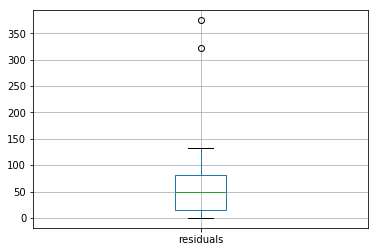

In [186]:
# checking outliers in training data residuals
train_data['residuals'] = abs((train_data['Fare$'] - train_data['PredictedFare']))
train_data[train_data['Uber Type']==2].boxplot(column='residuals')

There seem to be outliers in the residuals. These need to be removed for the model to work properly.
This can be done using the `Inter-Quartile Range (IQR)` wherein, datapoints that lie more than `1.5 * IQR` above the 3rd Quartile, and datapoints that lie more than `1.5 * IQR` below the 1st Quartile are dropped.

In [187]:
#Making a function that takes a dataframe and it's column as arguments, calculates the IQR for the given column,
#subsequently finds those datapoints that can be classified as outliers, and drops them from the column

def outlier_cleaner(dataframe,column):
    Quartile1 = dataframe[column].quantile(0.25)
    Quartile3 = dataframe[column].quantile(0.75)
    IQR = Quartile3 - Quartile1
    outliers = dataframe.loc[(dataframe[column] < (Quartile1 - 1.5 * IQR)) | (dataframe[column] > (Quartile3 + 1.5 * IQR))]
    return dataframe.drop(outliers.index)

# removing outliers in the missing set
train_data = pd.concat([outlier_cleaner(train_data[train_data['Uber Type'] == 0], 'residuals'),\
                        outlier_cleaner(train_data[train_data['Uber Type'] == 1], 'residuals'),\
                        outlier_cleaner(train_data[train_data['Uber Type'] == 2], 'residuals')])

In [188]:
#Checking for null values before proceeding to make the model again
train_data.isna().sum()

UberTypeID               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
Dep_date                 0
Weekend                  0
Dep_time                 0
TimePeriod               0
PredictedFare            0
residuals                0
dtype: int64

In [189]:
#Making the models again without the outliers
UberType0 = missing_set[missing_set['Uber Type'] == 0].copy()
UberType1 = missing_set[missing_set['Uber Type'] == 1].copy()
UberType2 = missing_set[missing_set['Uber Type'] == 2].copy()

dropped_na_train = train_data.copy()
dropped_na_train.dropna(subset=['Fare$'], axis=0, inplace = True)

UberType0_train = dropped_na_train[dropped_na_train['Uber Type'] == 0]
UberType1_train = dropped_na_train[dropped_na_train['Uber Type'] == 1]
UberType2_train = dropped_na_train[dropped_na_train['Uber Type'] == 2]

Model0 = LinearRegression()
Model1 = LinearRegression()
Model2 = LinearRegression()


Model0.fit(UberType0_train[model_predictors], UberType0_train['Fare$'])
Model1.fit(UberType1_train[model_predictors], UberType1_train['Fare$'])
Model2.fit(UberType2_train[model_predictors], UberType2_train['Fare$'])

UberType0['PredictedFare'] = Model0.predict(UberType0[[x for x in UberType0.columns if x in model_predictors]])
UberType1['PredictedFare'] = Model1.predict(UberType1[[x for x in UberType1.columns if x in model_predictors]])
UberType2['PredictedFare'] = Model2.predict(UberType2[[x for x in UberType2.columns if x in model_predictors]])

predictions_df = pd.concat([UberType0,UberType1,UberType2])

train_data = pd.merge(train_data, predictions_df[['UberTypeID','PredictedFare']], on = 'UberTypeID', how = 'left')

train_data_dropped = train_data.copy()
train_data_dropped.dropna(subset=['Fare$'], axis=0, inplace = True)

In [190]:
predictions_df

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Dep_date,Weekend,Dep_time,TimePeriod,PredictedFare
0,ID1282022974,0.0,5,2,-37.810562,144.936484,-37.820704,144.948038,1775.0,2018-04-04,03:50:38,400.56,3:57:18,14.14,2018-04-04,0.0,1900-01-01 03:50:38,2.0,14.449180
1,ID1158488261,0.0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-01-24,11:25:40,4292.40,12:37:12,10.80,2018-01-24,0.0,1900-01-01 11:25:40,0.0,11.547507
3,ID1855101110,0.0,2,7,-37.821829,144.952223,-37.861835,144.905716,8449.0,2018-01-05,23:32:35,2927.52,0:21:22,18.61,2018-01-05,0.0,1900-01-01 23:32:35,2.0,18.785694
5,ID1456755132,0.0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-04-23,21:44:31,12681.06,1:15:52,35.52,2018-04-23,0.0,1900-01-01 21:44:31,2.0,35.216919
6,ID1660499921,0.0,5,1,-37.801931,144.937772,-37.816965,144.966429,4209.0,2018-05-28,14:15:00,1124.82,14:33:44,9.31,2018-05-28,0.0,1900-01-01 14:15:00,1.0,10.909969
7,ID1819803391,0.0,9,5,-38.110916,144.654173,-37.805993,144.932510,43540.0,2018-04-24,15:59:15,10431.06,18:53:06,24.72,2018-04-24,0.0,1900-01-01 15:59:15,1.0,26.611348
9,ID1457478090,0.0,1,9,-37.804800,144.951559,-38.110916,144.654173,43476.0,2018-01-09,03:33:37,10448.76,6:27:45,30.61,2018-01-09,0.0,1900-01-01 03:33:37,2.0,31.416351
10,ID1680563903,0.0,2,8,-37.813416,144.940074,-37.815834,145.046450,9713.0,2018-07-07,11:14:05,2724.90,11:59:29,14.18,2018-07-07,1.0,1900-01-01 11:14:05,0.0,13.581698
11,ID1807027243,0.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-07-15,01:51:12,13173.36,5:30:45,40.95,2018-07-15,1.0,1900-01-01 01:51:12,2.0,40.811504
12,ID1538622120,0.0,5,9,-37.807581,144.932443,-38.110916,144.654173,43252.0,2018-03-21,11:41:09,10379.28,14:34:08,21.48,2018-03-21,0.0,1900-01-01 11:41:09,0.0,21.752638


In [191]:
print('Model Accuracy:\n')

for i in range(3):

    rmse_unit = mean_squared_error(train_data_dropped[train_data_dropped['Uber Type'] == i]['Fare$'], \
                              train_data_dropped[train_data_dropped['Uber Type'] == i]['PredictedFare_y'])
    
    r_square_unit = r2_score(train_data_dropped[train_data_dropped['Uber Type'] == i]['Fare$'],\
                  train_data_dropped[train_data_dropped['Uber Type'] == i]['PredictedFare_y'])
    
    print('For Uber Type:',i)
    print('Root Mean Squared Error:', rmse_unit)
    print('R2 score:', r_square_unit,'\n')
    
rmse_full = mean_squared_error(train_data_dropped['Fare$'], train_data_dropped['PredictedFare_y'])
r_square_full = r2_score(train_data_dropped['Fare$'], train_data_dropped['PredictedFare_y'])
print('For All 3 Uber Types')
print('Root mean squared error:', rmse_full)
print('R2 score:', r_square_full)

Model Accuracy:

For Uber Type: 0
Root Mean Squared Error: 0.7562134952362243
R2 score: 0.9878897749644504 

For Uber Type: 1
Root Mean Squared Error: 0.9675297389078995
R2 score: 0.9973765830716357 

For Uber Type: 2
Root Mean Squared Error: 584.6746053448318
R2 score: 0.9906814234158339 

For All 3 Uber Types
Root mean squared error: 84.96600875912915
R2 score: 0.9938635136266104


As we can see once the outliers are removed, the model becomes a much better fit, showing high R-Squared values and low Mean squared errors across all 3 `Uber Types`, and for the whole dataset.

In [192]:
missing_set = pd.merge(missing_set,predictions_df[['UberTypeID','PredictedFare']], on = 'UberTypeID', how = 'left')

In [193]:
#Check for Nulls
missing_set['Fare$'].isna().sum()

19

In [194]:
#Set those values in Fare$ which have nulls with the corresponding value in the PredictedFare that we obtained after running
# our regression model
missing_set.loc[missing_set['Fare$'].isnull(),'Fare$'] = missing_set.loc[missing_set['Fare$'].isnull(),'PredictedFare']

In [195]:
# Check for nulls after imputation
missing_set['Fare$'].isna().sum()

0

In [196]:
missing_set['Fare$'] = round(missing_set['Fare$'],2)

In [197]:
missing_set

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Dep_date,Weekend,Dep_time,TimePeriod,PredictedFare
0,ID1282022974,0.0,5,2,-37.810562,144.936484,-37.820704,144.948038,1775.0,2018-04-04,03:50:38,400.56,3:57:18,14.14,2018-04-04,0.0,1900-01-01 03:50:38,2.0,14.449180
1,ID1158488261,0.0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-01-24,11:25:40,4292.40,12:37:12,10.80,2018-01-24,0.0,1900-01-01 11:25:40,0.0,11.547507
2,ID3243847878,1.0,6,9,-37.787442,144.980409,-38.110916,144.654173,47035.0,2018-07-03,19:11:08,11407.86,22:21:15,54.77,2018-07-03,0.0,1900-01-01 19:11:08,1.0,55.838046
3,ID1855101110,0.0,2,7,-37.821829,144.952223,-37.861835,144.905716,8449.0,2018-01-05,23:32:35,2927.52,0:21:22,18.61,2018-01-05,0.0,1900-01-01 23:32:35,2.0,18.785694
4,ID3243007427,1.0,5,4,-37.813111,144.933559,-37.809767,144.992662,6439.0,2018-05-24,08:59:46,1609.56,9:26:35,12.47,2018-05-24,0.0,1900-01-01 08:59:46,0.0,11.070358
5,ID1456755132,0.0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-04-23,21:44:31,12681.06,1:15:52,35.52,2018-04-23,0.0,1900-01-01 21:44:31,2.0,35.216919
6,ID1660499921,0.0,5,1,-37.801931,144.937772,-37.816965,144.966429,4209.0,2018-05-28,14:15:00,1124.82,14:33:44,9.31,2018-05-28,0.0,1900-01-01 14:15:00,1.0,10.909969
7,ID1819803391,0.0,9,5,-38.110916,144.654173,-37.805993,144.932510,43540.0,2018-04-24,15:59:15,10431.06,18:53:06,24.72,2018-04-24,0.0,1900-01-01 15:59:15,1.0,26.611348
8,ID3439304827,1.0,1,9,-37.822198,144.956807,-38.110916,144.654173,42851.0,2018-04-27,02:49:01,10392.36,5:42:13,58.03,2018-04-27,0.0,1900-01-01 02:49:01,2.0,57.215292
9,ID1457478090,0.0,1,9,-37.804800,144.951559,-38.110916,144.654173,43476.0,2018-01-09,03:33:37,10448.76,6:27:45,30.61,2018-01-09,0.0,1900-01-01 03:33:37,2.0,31.416351


In [198]:
# The unnecessary columns that were created while making the model are now dropped
missing_set.drop(columns = ['Dep_date', 'Weekend', 'Dep_time', 'TimePeriod', 'PredictedFare'], inplace = True)

In [199]:
# The shape of the dataframe is checked before writing it to a file
missing_set.shape

(124, 14)

In [200]:
header = missing_set.columns.to_list()

In [201]:
header = missing_set.columns.to_list()
header[0] = ''
missing_set.to_csv('29819253_missing_value_solution.csv', index = False, header = header)


# Outliers

In [202]:
outlier_data = pd.read_csv("29819253_outliers.csv")

In [203]:
outlier_data.drop(columns = ['Unnamed: 0'], inplace = True)

In [204]:
outlier_data.rename(columns={'Unnamed: 0.1': 'UberTypeID'}, inplace = True)
outlier_data

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID3934553587,1,3,9,-37.818526,144.984100,-38.110916,144.654173,45343.0,2018-02-25,07:16:06,10904.58,10:17:50,45.620
1,ID3967781158,1,6,3,-37.773845,144.983689,-37.825414,144.995647,7311.0,2018-01-01,05:58:55,1529.64,6:24:24,18.060
2,ID5814348228,2,9,1,-38.110916,144.654173,-37.812633,144.951830,43024.0,2018-04-28,18:35:44,10415.70,21:29:19,909.580
3,ID1517212136,0,8,1,-37.815834,145.046450,-37.818926,144.962482,7886.0,2018-07-21,08:06:00,2324.34,8:44:44,14.250
4,ID3490748262,1,6,1,-37.787433,144.980377,-37.796543,144.951254,4093.0,2018-03-03,03:43:26,1014.24,4:00:20,9.995
5,ID3531927947,1,3,2,-37.812688,144.987874,-37.815754,144.936909,5141.0,2018-06-10,14:26:54,1263.18,14:47:57,15.300
6,ID1320698773,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-02-01,15:15:43,11355.66,18:24:58,27.470
7,ID3435682121,1,6,3,-37.790797,144.985865,-37.807653,144.989339,2341.0,2018-07-22,02:29:42,674.10,2:40:56,17.850
8,ID3774840019,1,1,5,-37.800551,144.968596,-37.803849,144.918724,5126.0,2018-03-27,01:24:39,1342.08,1:47:01,16.100
9,ID1883261892,0,8,4,-37.815834,145.046450,-37.804076,145.005170,5372.0,2018-07-18,11:52:10,1647.42,12:19:37,7.770


In [205]:
outlier_data.describe()

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,0.684211,5.400000,5.284211,-37.860141,144.917144,-37.867482,144.911681,20237.547368,5261.057684,75.589789
std,0.688247,2.619079,2.644397,0.107382,0.116704,0.112407,0.122639,18748.108823,4560.450887,179.991577
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,1424.000000,355.020000,5.495000
25%,0.000000,3.000000,3.000000,-37.861835,144.905716,-37.861835,144.905716,6096.000000,1587.000000,13.135000
50%,1.000000,6.000000,6.000000,-37.815466,144.938948,-37.816396,144.948350,10401.000000,3311.100000,18.060000
75%,1.000000,7.000000,7.000000,-37.805226,144.985865,-37.807202,144.987573,43294.000000,10450.830000,31.040000
max,2.000000,9.000000,9.000000,-37.773803,145.046450,-37.773803,145.046450,51032.000000,13204.980000,1134.560000


As we can see, there are no missing values in the file.
However, `Journey Distance`, `Travel Time`, and `Fare` columns seem to have outliers, wherein the max value is much higher than the median and 3rd Quantile values. 
Let us plot these to get an idea of this

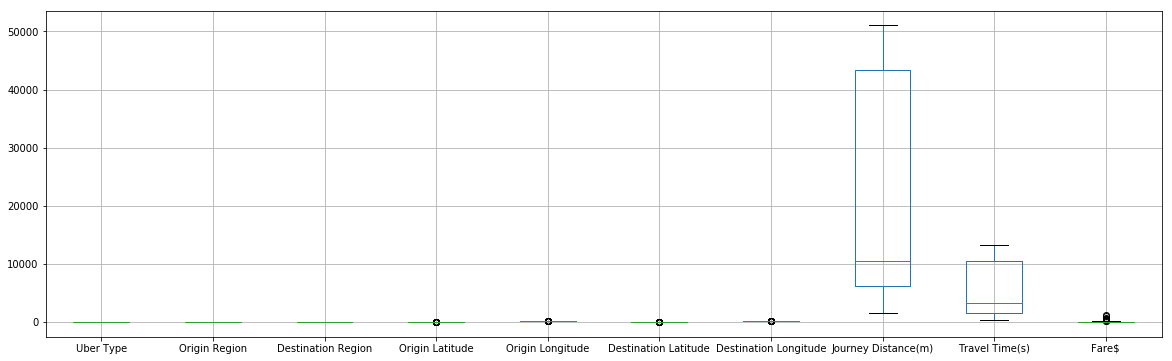

In [206]:
plt.figure(figsize=(20,6))
outlier_data.boxplot()

Seems like there are no evident outliers for `Journey Distance` or `Travel Time`.


`Fare` seems to have some outliers, which we shall see in better detail

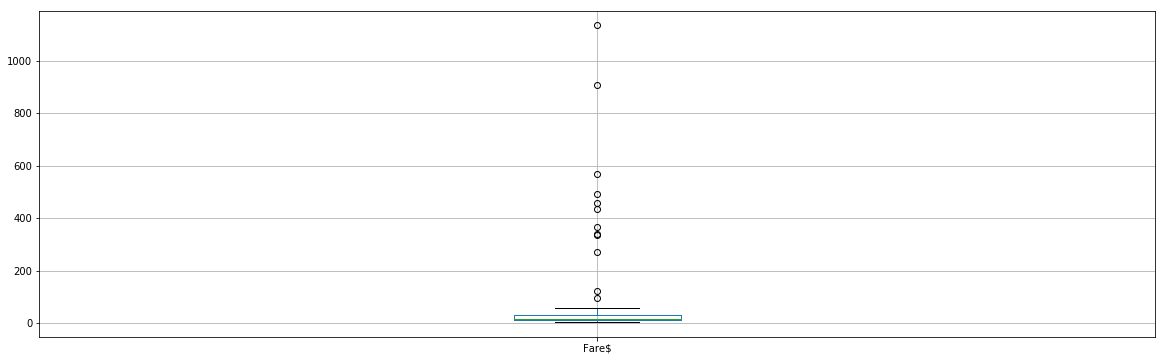

In [207]:
plt.figure(figsize=(20,6))
outlier_data.boxplot(column='Fare$')

Outliers can be detected in 2 ways:

1. Using the IQR method of outliers lying 1.5 * IQR above the 3rd Quartile or 1.5 * IQR below the 1st Quartile, 
2. Using the empirical rule wherein datapoints lying 3 Standard Deviations away from the mean are taken as outliers.

I am choosing to use the IQR method to classify outliers below:

In [208]:
#This function was used in the missing values part to drop outliers,
# I have used it here again, and changed it so that it returns the index of the outlier datapoints rather than drop them
def outlier_detector(dataframe,column):
    Quartile1 = dataframe[column].quantile(0.25)
    Quartile3 = dataframe[column].quantile(0.75)
    
    IQR = Quartile3 - Quartile1
    
    Outliers = dataframe.loc[(dataframe[column] < (Quartile1 - 1.5 * IQR)) | (dataframe[column] > (Quartile3 + 1.5 * IQR))]
    return Outliers.index

In [209]:
outlier_detector(outlier_data[outlier_data['Uber Type']==0], 'Fare$')

Int64Index([], dtype='int64')

In [210]:
outlier_detector(outlier_data[outlier_data['Uber Type']==1], 'Fare$')

Int64Index([0, 32, 39, 50, 54], dtype='int64')

In [211]:
outlier_detector(outlier_data[outlier_data['Uber Type']==2], 'Fare$')

Int64Index([2, 13], dtype='int64')

Evidently, there are no outliers in `Fare` for `Uber Type 0`,

There are 5 outliers in `Fare` for `Uber Type 1`,

And There are 2 outliers in `Fare` for `Uber Type 2`

In [212]:
outlier_detector(outlier_data[outlier_data['Uber Type']==0], 'Journey Distance(m)')

Int64Index([], dtype='int64')

In [213]:
outlier_detector(outlier_data[outlier_data['Uber Type']==1], 'Journey Distance(m)')

Int64Index([0, 29, 32, 39, 49, 50, 52, 54, 58], dtype='int64')

In [214]:
outlier_detector(outlier_data[outlier_data['Uber Type']==2], 'Journey Distance(m)')

Int64Index([], dtype='int64')

Seems like there are outliers for `Journey Distance` for `Uber Type 1`

In [215]:
outlier_detector(outlier_data[outlier_data['Uber Type']==0], 'Travel Time(s)')

Int64Index([], dtype='int64')

In [216]:
outlier_detector(outlier_data[outlier_data['Uber Type']==1], 'Travel Time(s)')

Int64Index([0, 29, 32, 39, 49, 50, 52, 54, 58], dtype='int64')

In [217]:
outlier_detector(outlier_data[outlier_data['Uber Type']==2], 'Travel Time(s)')

Int64Index([], dtype='int64')

There also seem to be outliers for `Travel Time` for `Uber Type 1`

### Evidently, when the entire file is checked for outliers, there are fewer outliers because the journey distance and travel times are different for every `Uber Type`
### It thus makes more sense to check for outliers separately for every `Uber Type`

# Making a model for the outlier file

In [218]:
#Assigning Categorical columns for Weekend, and TimePeriod for use in making the model

#making a new date column
outlier_data['Dep_date'] = pd.to_datetime(outlier_data.loc[:,'Departure Date'].values)

#Assigning Weekends
outlier_data.loc[outlier_data['Dep_date'].dt.dayofweek > 4, 'Weekend'] = 1
outlier_data.loc[outlier_data['Dep_date'].dt.dayofweek <= 4, 'Weekend'] = 0

#making a new time column
outlier_data['Dep_time'] = pd.to_datetime(outlier_data.loc[:,'Departure Time'].values, format = '%H:%M:%S')

#Assigning TimePeriod
outlier_data.loc[(outlier_data['Dep_time'].dt.hour >= 6) & (outlier_data['Dep_time'].dt.hour < 12), 'TimePeriod'] = 0
outlier_data.loc[(outlier_data['Dep_time'].dt.hour >= 12) & (outlier_data['Dep_time'].dt.hour < 21), 'TimePeriod'] = 1
outlier_data.loc[(outlier_data['Dep_time'].dt.hour >= 21) | (outlier_data['Dep_time'].dt.hour < 6), 'TimePeriod'] = 2

#check for nulls
outlier_data.isna().sum()

UberTypeID               0
Uber Type                0
Origin Region            0
Destination Region       0
Origin Latitude          0
Origin Longitude         0
Destination Latitude     0
Destination Longitude    0
Journey Distance(m)      0
Departure Date           0
Departure Time           0
Travel Time(s)           0
Arrival Time             0
Fare$                    0
Dep_date                 0
Weekend                  0
Dep_time                 0
TimePeriod               0
dtype: int64

In [219]:
UberType0 = outlier_data[outlier_data['Uber Type'] == 0].copy()
UberType1 = outlier_data[outlier_data['Uber Type'] == 1].copy()
UberType2 = outlier_data[outlier_data['Uber Type'] == 2].copy()

In [220]:
UberType0['PredictedFare'] = Model0.predict(UberType0[[x for x in UberType0.columns if x in model_predictors]])
UberType1['PredictedFare'] = Model1.predict(UberType1[[x for x in UberType1.columns if x in model_predictors]])
UberType2['PredictedFare'] = Model2.predict(UberType2[[x for x in UberType2.columns if x in model_predictors]])

outlier_data = pd.concat([UberType0,UberType1,UberType2])

In [221]:
#Calculating Residuals
outlier_data['Residuals'] = outlier_data['Fare$'] - round(outlier_data['PredictedFare'],2)
outlier_data.head()

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,Dep_date,Weekend,Dep_time,TimePeriod,PredictedFare,Residuals
3,ID1517212136,0,8,1,-37.815834,145.046450,-37.818926,144.962482,7886.0,2018-07-21,08:06:00,2324.34,8:44:44,14.25,2018-07-21,1.0,1900-01-01 08:06:00,0.0,12.908323,1.34
6,ID1320698773,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-02-01,15:15:43,11355.66,18:24:58,27.47,2018-02-01,0.0,1900-01-01 15:15:43,1.0,28.178884,-0.71
9,ID1883261892,0,8,4,-37.815834,145.046450,-37.804076,145.005170,5372.0,2018-07-18,11:52:10,1647.42,12:19:37,7.77,2018-07-18,0.0,1900-01-01 11:52:10,0.0,7.038156,0.73
10,ID1430059200,0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-06-17,19:13:51,12681.06,22:45:12,34.73,2018-06-17,1.0,1900-01-01 19:13:51,1.0,35.166061,-0.44
11,ID1501434333,0,4,6,-37.811059,145.001027,-37.773803,144.983647,9580.0,2018-01-03,16:49:01,2914.02,17:37:35,13.16,2018-01-03,0.0,1900-01-01 16:49:01,1.0,13.968641,-0.81


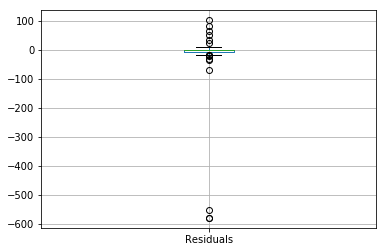

In [222]:
#Plotting a Boxplot for the residuals to check for outliers
outlier_data.boxplot(column = 'Residuals')

There seem to be many outliers here.

A better option to check outliers would be to use the `outlier_detector` function on each `Uber Type`, and see which datapoints need to be cleaned

In [223]:
outlier_detector(outlier_data[outlier_data['Uber Type']==0], 'Residuals')

Int64Index([16, 22, 33, 34, 40, 53, 85], dtype='int64')

In [224]:
outlier_detector(outlier_data[outlier_data['Uber Type']==1], 'Residuals')

Int64Index([49, 58], dtype='int64')

In [225]:
outlier_detector(outlier_data[outlier_data['Uber Type']==2], 'Residuals')

Int64Index([25, 27], dtype='int64')

## Removing Outliers Found

In [226]:
clean_file = pd.concat([outlier_data[outlier_data['Uber Type']==0].drop(outlier_detector(outlier_data\
            [outlier_data['Uber Type']==0],'Residuals')), \
           outlier_data[outlier_data['Uber Type']==1].drop(outlier_detector(outlier_data[outlier_data['Uber Type']==1],\
                                                                            'Residuals')), \
           outlier_data[outlier_data['Uber Type']==2].drop(outlier_detector(outlier_data[outlier_data['Uber Type']==2],'Residuals'))])


In [227]:
clean_file.drop(columns=['Dep_date', 'Weekend', 'Dep_time', 'TimePeriod', 'PredictedFare', 'Residuals'], inplace = True)

In [228]:
clean_file

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
3,ID1517212136,0,8,1,-37.815834,145.046450,-37.818926,144.962482,7886.0,2018-07-21,08:06:00,2324.34,8:44:44,14.250
6,ID1320698773,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-02-01,15:15:43,11355.66,18:24:58,27.470
9,ID1883261892,0,8,4,-37.815834,145.046450,-37.804076,145.005170,5372.0,2018-07-18,11:52:10,1647.42,12:19:37,7.770
10,ID1430059200,0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-06-17,19:13:51,12681.06,22:45:12,34.730
11,ID1501434333,0,4,6,-37.811059,145.001027,-37.773803,144.983647,9580.0,2018-01-03,16:49:01,2914.02,17:37:35,13.160
14,ID1310020275,0,6,9,-37.790797,144.985865,-38.110916,144.654173,47193.0,2018-02-09,21:29:18,11530.62,0:41:28,32.160
17,ID1180025127,0,8,7,-37.815834,145.046450,-37.861835,144.905716,15151.0,2018-04-09,11:29:38,4917.48,12:51:35,12.830
20,ID1362480668,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-01-27,06:11:58,13204.98,9:52:02,32.260
21,ID1688256138,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-06-22,13:43:45,13204.98,17:23:49,30.560
23,ID1816105875,0,6,3,-37.773803,144.983647,-37.811682,144.983426,8225.0,2018-06-25,18:53:12,2571.18,19:36:03,13.400


In [229]:
clean_file.shape[0]

84

The original dataframe had 95 rows, while the cleaned one has 84.

Thus **11** rows had outliers and were removed.

In [230]:
headers_file = pd.read_csv('29819253_outliers.csv')
clean_file['header_1'] = headers_file['Unnamed: 0'] 

In [231]:
clean_file

,UberTypeID,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$,header_1
3,ID1517212136,0,8,1,-37.815834,145.046450,-37.818926,144.962482,7886.0,2018-07-21,08:06:00,2324.34,8:44:44,14.250,3
6,ID1320698773,0,9,6,-38.110916,144.654173,-37.787433,144.980377,47033.0,2018-02-01,15:15:43,11355.66,18:24:58,27.470,6
9,ID1883261892,0,8,4,-37.815834,145.046450,-37.804076,145.005170,5372.0,2018-07-18,11:52:10,1647.42,12:19:37,7.770,9
10,ID1430059200,0,9,8,-38.110916,144.654173,-37.815834,145.046450,51032.0,2018-06-17,19:13:51,12681.06,22:45:12,34.730,10
11,ID1501434333,0,4,6,-37.811059,145.001027,-37.773803,144.983647,9580.0,2018-01-03,16:49:01,2914.02,17:37:35,13.160,11
14,ID1310020275,0,6,9,-37.790797,144.985865,-38.110916,144.654173,47193.0,2018-02-09,21:29:18,11530.62,0:41:28,32.160,14
17,ID1180025127,0,8,7,-37.815834,145.046450,-37.861835,144.905716,15151.0,2018-04-09,11:29:38,4917.48,12:51:35,12.830,17
20,ID1362480668,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-01-27,06:11:58,13204.98,9:52:02,32.260,20
21,ID1688256138,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-06-22,13:43:45,13204.98,17:23:49,30.560,21
23,ID1816105875,0,6,3,-37.773803,144.983647,-37.811682,144.983426,8225.0,2018-06-25,18:53:12,2571.18,19:36:03,13.400,23


In [232]:
clean_file = clean_file[['header_1', 'UberTypeID','Uber Type', 'Origin Region', 'Destination Region', 'Origin Latitude',\
                         'Origin Longitude','Destination Latitude', 'Destination Longitude','Journey Distance(m)',\
                         'Departure Date', 'Departure Time', 'Travel Time(s)', 'Arrival Time', 'Fare$']]

The cleaned file with the correct headers is then written to the output file `29819253_outliers_solution.csv`

In [233]:
header = headers_file.columns.to_list()
header[0] = ''
header[1] = 'Unnamed: 0'
clean_file.to_csv('29819253_outliers_solution.csv', index = False, header = header)

# Conclusions

1. The different types of Data Anomalies were found in the three files, and were cleaned accordingly
2. Various types of Exploratory Data Analysis was done to find out these errors. These were both graphical and non-graphical
3. The Data cleansing part included both manual and automated model fitting techniques

# References

1. Alexandria Repository
2. Python Documentation
3. Scikit-learn documentation
4. Pandas Documentation
5. Stack Overflow

# Notes:
1. Please make sure that all the data files required for this code to run are present in the same directory as this notebook
2. Please make sure that you run all code blocks sequentially